## This Jupyter file is used for Lending Club Case study - doing EDA analysis on data set to arrive at lending decision analysis

## 1) Add All Libraries to be imported 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")


## 2) Lets do basic study of data set by loading same 

In [2]:
loan=pd.read_csv('./loan.csv', low_memory=False)  # low _memory= false to avoid loading error on finding dtypes

In [3]:
loan.shape
# The data Set has 39K+ rows and 111 variables as columns

(39717, 111)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 3) Start with Data Cleaning aligned with needed columns of importance 

### <span style='color:blue'> a) Check for columns with null values and can be removed </span>

In [5]:
# checking for all null values in columns and identifying them for dropping.
print('column which has no values at all and can be removed :\n ')
useless_col=[]
for col in loan.columns:
    totalNan=loan[col].isna().sum()
    if totalNan == len(loan):
        useless_col.append(col)
print (useless_col)
print('\n Total useless columns: ' , len(useless_col))


column which has no values at all and can be removed :
 
['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'tot

### <span style='color:blue'> b) Drop null value columns </span>

In [6]:
# Drop the null columns
for col in useless_col:
    loan.drop(col,axis=1,inplace=True)

### <span style='color:blue'> c) Check for columns with all zero value </span>

In [7]:
# checking for all zero values in columns and identifying them for dropping.
print('column which has no values at all and can be removed :\n ')
zero_col=[]
for col in loan.columns:
    if (loan[col] == 0).all():
        zero_col.append(col)
print (zero_col)
print('\n Total useless columns with zero value: ' , len(zero_col))

column which has no values at all and can be removed :
 
['acc_now_delinq', 'delinq_amnt']

 Total useless columns with zero value:  2


###  <span style='color:blue'> d) Drop all columns with all zero values and zero is not a useful analysis value </span>

In [8]:
# Drop the zero value columns
for col in zero_col:
    loan.drop(col,axis=1,inplace=True)


###   <span style='color:blue'> e) Check for all columns which has either 0 or NaN value only </span>

In [9]:
# checking for all zero or Null  values in columns and identifying them for dropping.
print('column which has either 0 or no values at all and can be removed :\n ')
zeroNan_col=[] 
for col in loan.columns:
    sum=(loan[col] == 0).sum() + (loan[col].isna().sum())
    if sum == len(loan):
        zeroNan_col.append(col)
print (zeroNan_col)
print('\n Total useless columns with zero value or only Nan values: ' , len(zeroNan_col))


column which has either 0 or no values at all and can be removed :
 
['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']

 Total useless columns with zero value or only Nan values:  3


###  <span style='color:blue'> f) Drop all columns with all zero or NaN values and zero is not a useful analysis value </span>

In [10]:
# Drop  the zero or null value only  value columns
for col in zeroNan_col:
    loan.drop(col,axis=1,inplace=True)

In [11]:
loan.shape

(39717, 52)

###  <span style='color:blue'> g) Check for all Columns which has constant data and add no meaning or impact </span>

In [12]:
constantcol=[]
for col in loan.columns:
    if loan[col].nunique() <= 1:
        constantcol.append(col)
print (constantcol)
print('\n Total columns with constant value adding no additional benefit : ',len(constantcol))

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type']

 Total columns with constant value adding no additional benefit :  4


###  <span style='color:blue'> h) Drop all columns with constant value </span>

In [13]:
for col in constantcol:
    loan.drop(col,axis=1,inplace=True)

In [14]:
print('\n Total columns with data:', len(loan.columns) - len(zeroNan_col))


 Total columns with data: 45


###  <span style='color:blue'> i) Convert  variables with year/month to month-year format instead of string </span>

In [15]:
loan['issue_d'].describe()

count      39717
unique        55
top       Dec-11
freq        2260
Name: issue_d, dtype: object

In [16]:
loan['issue_d']=loan['issue_d'].apply(lambda x: str(x).replace("-","-20"))
loan['issue_d']=pd.to_datetime(loan['issue_d'])

In [17]:
loan['last_pymnt_d']=loan['last_pymnt_d'].apply(lambda x: str(x).replace("-","-20"))
loan['last_pymnt_d']=pd.to_datetime(loan['last_pymnt_d'])

In [18]:
print (loan['earliest_cr_line'].describe())
print (loan['next_pymnt_d'].value_counts())
# looks like year to be considered as per data is 2016 , so any year 0-16 in column is 20xx
# and others are all 19xx

count      39717
unique       526
top       Nov-98
freq         370
Name: earliest_cr_line, dtype: object
Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64


In [19]:
loan['earliest_cr_line']=loan['earliest_cr_line'].apply(lambda x: str(x).replace("-","-20") if int(str(x).split('-')[1]) <=16 else str(x).replace("-","-19"))

In [20]:
loan['earliest_cr_line']=pd.to_datetime(loan['earliest_cr_line'])
# later we may need this conversion to calculate the nuber of months credit line exists for the member

In [21]:
loan.loc[:,['earliest_cr_line','last_pymnt_d','issue_d']].head(5)

,earliest_cr_line,last_pymnt_d,issue_d
0,1985-01-01,2015-01-01,2011-12-01
1,1999-04-01,2013-04-01,2011-12-01
2,2001-11-01,2014-06-01,2011-12-01
3,1996-02-01,2015-01-01,2011-12-01
4,1996-01-01,2016-05-01,2011-12-01


###  <span style='color:blue'> j) Rename some columns for clarity and easy finding </span>

In [22]:
loan.rename(columns={'total_acc':'totalcreditlines','open_acc': 'opencreditlines','revol_util' : 'creditUtilizationRatio','dti' : 'debtToIncomeRatio'},inplace=True)

In [23]:
loan.loc[:,['id','member_id','creditUtilizationRatio','opencreditlines','debtToIncomeRatio']].head(5)

,id,member_id,creditUtilizationRatio,opencreditlines,debtToIncomeRatio
0,1077501,1296599,83.70%,3,27.65
1,1077430,1314167,9.40%,3,1.00
2,1077175,1313524,98.50%,2,8.72
3,1076863,1277178,21%,10,20.00
4,1075358,1311748,53.90%,15,17.94


### <span style='color:blue'> k) Check for similar value columns and drop useless ones </span>

In [24]:
print (loan['title'].value_counts().head(5))
print (loan['purpose'].value_counts().head(5))
# looks like title and purpose and descr are similar , purpose is more cleaner and well doucmented , lets drop desc,title

Debt Consolidation         2184
Debt Consolidation Loan    1729
Personal Loan               659
Consolidation               517
debt consolidation          505
Name: title, dtype: int64
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
Name: purpose, dtype: int64


In [25]:
loan['desc'].value_counts().head(10)

                                                                                                               210
Debt Consolidation                                                                                               8
Camping Membership                                                                                               6
credit card consolidation                                                                                        3
Personal Loan                                                                                                    3
credit card debt consolidation                                                                                   3
personal loan                                                                                                    3
This loan would be to consolidate my credit card debts, and have one payment at a reasonable interest rate.      2
consolidate credit cards                                                        

In [26]:
## Drop unwanted duplicate columns  - desc. title

In [27]:
loan.drop('title',axis=1,inplace=True)
loan.drop('desc',axis=1,inplace=True)

### <span style='color:blue'> l) Drop unwanted columns although they have values but no point holding them in data set </span>

In [28]:
# Some columns such as url , emp title , etc have no value in our analysis
loan.drop('url',axis=1,inplace=True)
loan.drop('emp_title',axis=1,inplace=True)

### <span style='color:blue'> m) Cleaning data types - removing special characters for variables which may be used for univariate or bivariate analysis </span>

####   <span style='color:blue'>  Also cleaning Important variables used for calculating FICO score </span>

In [29]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [30]:
# remove % symbol from Interest rate for using same
loan['int_rate']=loan['int_rate'].apply(lambda x: str(x).replace("%",""))
loan['int_rate']=loan['int_rate'].apply(lambda x: float(x))

In [31]:
# Remove % symbol from creditUtlizationRation
loan['creditUtilizationRatio']=loan['creditUtilizationRatio'].apply(lambda x: str(x).replace("%",""))
loan['creditUtilizationRatio']=loan['creditUtilizationRatio'].apply(lambda x: float(x))

In [32]:
# To study employment years , remove years and other characters
char_to_replace=[' year','s','+','< ']
for i in char_to_replace:
    loan['emp_length']=loan['emp_length'].apply(lambda x: str(x).replace(i,""))
loan['emp_length']=loan['emp_length'].apply(lambda x: float(x))

### n) <span style='color:blue'> Check if there more than 10% or 50% or other - NULL values in any columns? </span>

In [33]:
partialnullcolumns=pd.DataFrame(columns=['Columns' , 'NullPercent'])
for i in range(0,len(loan.isna().sum()) - 1):
    if loan.isna().sum()[i] != 0:
        partialnullcolumns=partialnullcolumns.append({'Columns':loan.isna().sum().index[i], 'NullPercent': loan.isna().sum()[i] / loan.shape[0] *100 },ignore_index=True)
        

In [34]:
partialnullcolumns

,Columns,NullPercent
0,emp_length,2.706650
1,mths_since_last_delinq,64.662487
2,mths_since_last_record,92.985372
3,creditUtilizationRatio,0.125891
4,last_pymnt_d,0.178765
5,next_pymnt_d,97.129693
6,last_credit_pull_d,0.005036


In [35]:
# we are not using last_pymnt_d, next_pymnt_d , lest_credit_pull_d , mths_since_last_delinq , 
# mths_since_last_record -- since they have huge percent of Nul or not required
modevalue=loan['emp_length'].mode()
loan['emp_length'].replace('nan',np.nan ,inplace=True)
loan['emp_length'].fillna(value=modevalue,inplace=True)
# we ignore Credit utu=ilization ratio null value , it is very minimal.

## 4) Copy Cleaned data set to new one.

In [36]:
cleaned_loan = loan

## 5) Derived Metrics from Loan data set and also create subset dataset for analysis 

### <span style='color:blue'> a) prepare annual income,loan amount, interest rate buckets  for later analysis </span>

In [37]:
##Preparebuckets for the Annual income using pd.cut
bins = [0,20000,40000,60000,80000,100000,1000000,np.inf]
labels = ["'0-20k'","'20k-40k'","'40k-60k'","'60k-80k'","'80k-100k'","100k-1M","'>1M'"]
cleaned_loan['annual_inc_bucket'] = pd.cut(cleaned_loan['annual_inc'], bins=bins, labels=labels)

In [38]:
##Prepare buckets for the loan amount using pd.cut
bins = [0,5000,10000,15000,20000,25000,30000,np.inf]
labels = ["'0-5k'","'5k-10k'","'10k-15k'","'15k-20k'","'20k-25k'","'25k-30k'","'>30k'"]
cleaned_loan['loan_amnt_bucket'] = pd.cut(cleaned_loan['loan_amnt'], bins=bins, labels=labels)

In [39]:
##Prepare buckets for the interest rate using pd.cut
bins = [0,5,10,15,20,25,np.inf]
labels = ["0-5%","5%-10%","10%-15%","15%-20%","20%-25%",">25%"]
cleaned_loan['int_rate_bucket'] = pd.cut(cleaned_loan['int_rate'], bins=bins, labels=labels)

### <span style='color:blue'> b) prepare loan duration in months </span>

In [40]:
cleaned_loan['loandurationmonths']= cleaned_loan['total_pymnt']/cleaned_loan['installment']

### <span style='color:blue'> c) calculate credit history length </span>

In [41]:
print (cleaned_loan['next_pymnt_d'].value_counts())
# month 6 and year 2016 is used to calculated history length in months.

cleaned_loan['creditHistoryLength']=6 - pd.DatetimeIndex(cleaned_loan['earliest_cr_line']).month + 12*(2016 - pd.DatetimeIndex(cleaned_loan['earliest_cr_line']).year)

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64


### <span style='color:blue'> d) Credit Score Calculation - Business Derived Metrics </span>

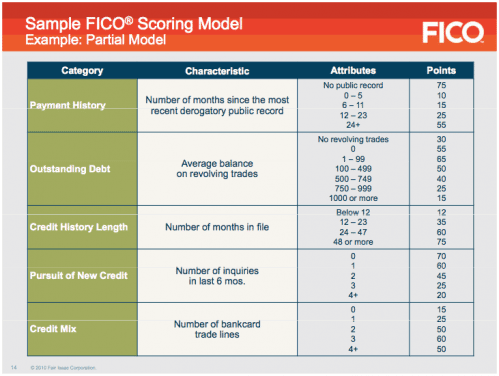

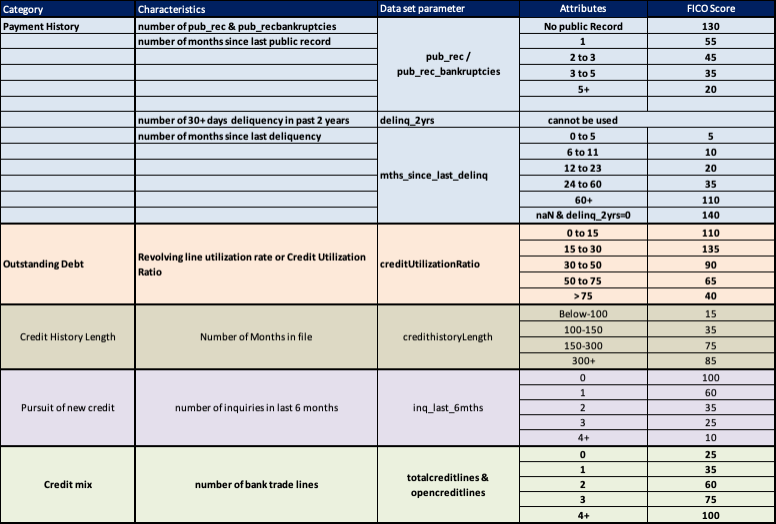

#### <span style='color:blue'> Lets start Calculating Credit score range for each category and keep adding them to total Credit SCORE </span>

####  <span style='color:blue'>Category : Credit Mix for Credit Score  - impacts 10% of Score </span>

In [42]:
cleaned_loan['CreditScore']=cleaned_loan['opencreditlines'].apply(lambda x: 25 if x == 0 else (35 if x == 1 else (60 if x ==2 else (75 if x == 3 else 100))))

####  <span style='color:blue'> Category : Pursuit of new credit for Credit  Score - impacts 10% of Score </span>

In [43]:
cleaned_loan['CreditScore']=cleaned_loan['CreditScore'] + cleaned_loan['inq_last_6mths'].apply(lambda x: 100 if x == 0 else (60 if x == 1 else (35 if x ==2 else (25 if x == 3 else 10))))

####  <span style='color:blue'> Category : Credit History Length for Credit Score - impacts 15% of Score </span>

In [44]:
cleaned_loan['CreditScore']=cleaned_loan['CreditScore'] + cleaned_loan['creditHistoryLength'].apply(lambda x: 15 if x < 100 else (35 if x >=100 and x <= 150 else (75 if x >=150 and x<=300 else 85)))

####  <span style='color:blue'>Category : Payment and Bad reference history for Credit Score - impacts 35% of Score </span>

In [45]:
# since we use months since last record for finding payment history , lets see his validaty of values
# and if we have enough values 
print (len(cleaned_loan[cleaned_loan['mths_since_last_record'].isna()]))
# and we see if it is of very high value whihc means , not valid to use for payment history 
# no point filling naN with zero here, since zero for mths_since_last_record is very good history

36931


In [46]:
# lets see number of public records and public records bandkruptcies.
print (len(cleaned_loan[cleaned_loan['pub_rec'].isna()]))
print (len(cleaned_loan[cleaned_loan['pub_rec_bankruptcies'].isna()]))
# it makes sense to use public record entries.

0
697


In [47]:
cleaned_loan['CreditScore']=cleaned_loan['CreditScore'] + cleaned_loan.apply(lambda x: 130 if x['pub_rec'] == 0 else (20 if x['pub_rec'] >= 5 else(35 if x['pub_rec'] >= 3 and x['pub_rec'] < 5 else (45 if x['pub_rec'] > 1 and x['pub_rec'] < 3 else 55 ) ) ), axis=1)

In [48]:
cleaned_loan['CreditScore']=cleaned_loan['CreditScore'] + cleaned_loan.apply(lambda x: 5 if x['mths_since_last_delinq'] <= 5 else (10 if x['mths_since_last_delinq'] >=6 and x['mths_since_last_delinq'] <= 11 else (20 if x['mths_since_last_delinq'] >=12 and x['mths_since_last_delinq'] <= 23 else (35 if x['mths_since_last_delinq']>= 24 and x['mths_since_last_delinq']<= 60 else (140 if pd.isna(x['mths_since_last_delinq']) and x['delinq_2yrs'] == 0 else 110 ) ) )),axis=1)

#### <span style='color:blue'> Category : Outstanding Debt for Credit Score - impacts 30% of Score </span>

In [49]:
## lets analyse credit utization ratio or revolving line utlization rate to find the range for mapping to FICO score
# a good credit utilization score whihc impacts FICO ius around 15 to 30%
cleaned_loan['creditUtilizationRatio'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: creditUtilizationRatio, dtype: float64

In [50]:
cleaned_loan['CreditScore']=cleaned_loan['CreditScore'] + cleaned_loan['creditUtilizationRatio'].apply(lambda x: 240 if x >= 0 and x<= 15 else (180 if x >=16 and x <= 30 else (90 if x >=31 and x<=50 else (25 if x>= 51 and x<= 75 else 10 ) )))

###  <span style='color:blue'> e) Define CreditScore bucket Ranges and derive same for easy analysis </span>

In [51]:
##Preparebuckets for the Annual income using pd.cut
bins = [0,300,500,600,700,1000]
labels = ["'0-300'","'300-500'","'500-600'","'600-700'","'700-1000'"]
cleaned_loan['CreditScoreBucket'] = pd.cut(cleaned_loan['CreditScore'], bins=bins, labels=labels)

In [52]:
# lets seperate out charged off and paid off loans to study those.
chargedoff_loan=cleaned_loan[cleaned_loan['loan_status'] == 'Charged Off']
chargedoff_loan.shape
paidoff_loan=cleaned_loan[cleaned_loan['loan_status'] == 'Fully Paid']

## 6) Univariate  analysis 

In [53]:
# lets analyse High range of FICO score
print ('Credit Score Analysis and data range, all loans:' , cleaned_loan['CreditScore'].describe())
print ('Credit Score Analysis and data range, chargedoff loans :' , chargedoff_loan['CreditScore'].describe())
Q1 = cleaned_loan['CreditScore'].quantile(0.25)
Q3 = cleaned_loan['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
print('\nIQR Range for Credit Score:', IQR)
print('\nTop Fence of Credit score Range :', len(cleaned_loan[cleaned_loan['CreditScore'] < (Q1 - 1.5 * IQR)]))
print('\nBottom Fence of Credit Score Range :', len(cleaned_loan[cleaned_loan['CreditScore'] > (Q3 + 1.5* IQR)]))


Credit Score Analysis and data range, all loans: count    39717.000000
mean       561.232470
std        105.275481
min        270.000000
25%        490.000000
50%        555.000000
75%        635.000000
max        795.000000
Name: CreditScore, dtype: float64
Credit Score Analysis and data range, chargedoff loans : count    5627.000000
mean      532.061489
std        94.616122
min       270.000000
25%       465.000000
50%       530.000000
75%       580.000000
max       795.000000
Name: CreditScore, dtype: float64

IQR Range for Credit Score: 145.0

Top Fence of Credit score Range : 5

Bottom Fence of Credit Score Range : 0


In [54]:
# Lets remove outliers outside fence of FICO score and analyse further with other variables

revised_loan=cleaned_loan[cleaned_loan['CreditScore'] >= (Q1 - 1.5 * IQR)]
revised_loan=revised_loan[revised_loan['CreditScore'] <= (Q3 + 1.5* IQR)]
revised_chargedOffloan=revised_loan[revised_loan['loan_status'] == 'Charged Off']
revised_paidOffloan=revised_loan[revised_loan['loan_status'] == 'Fully Paid']
revised_loan.shape

(39712, 51)

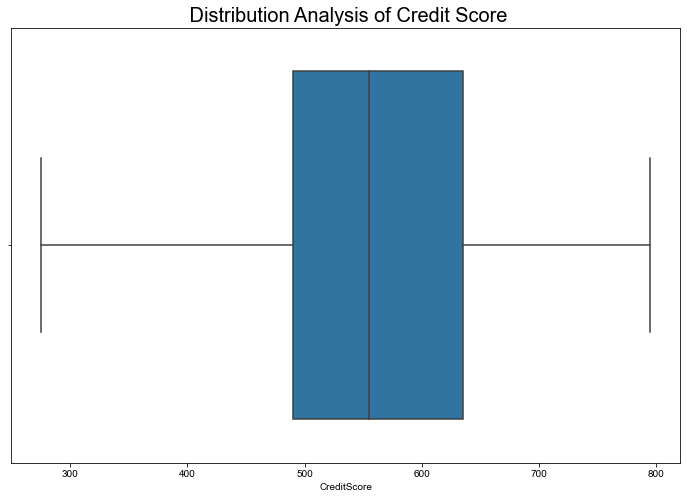

In [55]:
plt.figure(figsize=[12,8])
sns.boxplot(revised_loan['CreditScore'])
sns.set(font_scale=1) # font size 2
plt.title(" Distribution Analysis of Credit Score" , fontsize=20)
plt.savefig("creditScoreAnalysis.png",bbox_inches='tight', dpi=300)
plt.show()


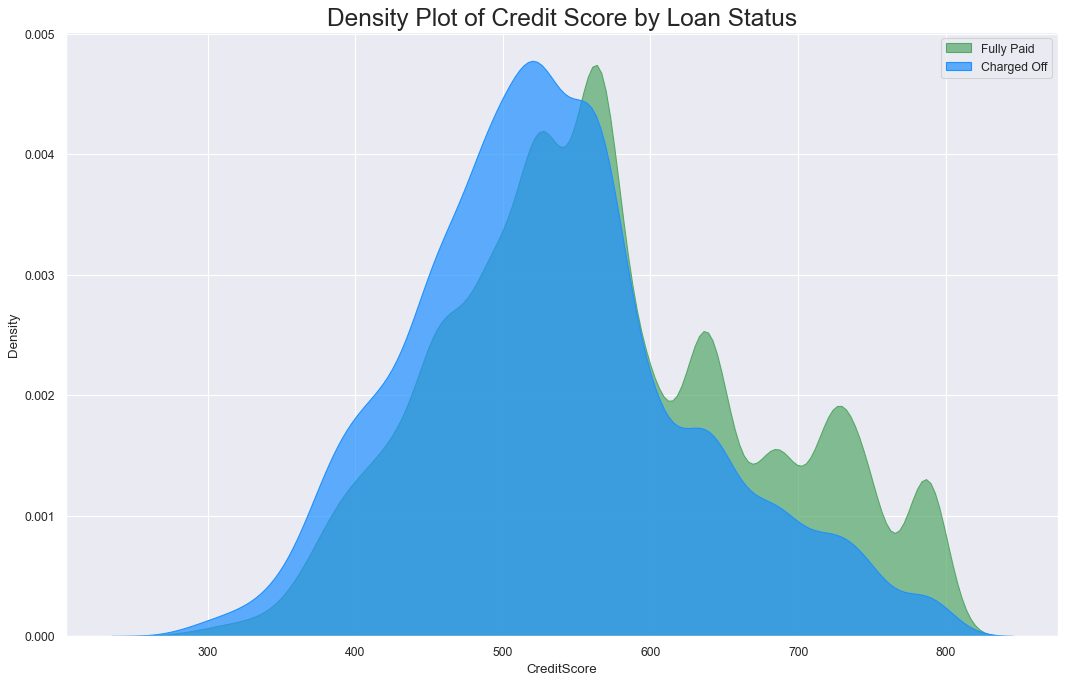

In [56]:
# this is similar to above univariate analysis of Credit Score but shown in different way

plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Fully Paid", "CreditScore"], shade=True, color="g", label="Fully Paid", alpha=.7)
#sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Current", "CreditScore"], shade=True, color="deeppink", label="Current", alpha=.7)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Charged Off", "CreditScore"], shade=True, color="dodgerblue", label="Charged Off", alpha=.7)

plt.title('Density Plot of Credit Score by Loan Status', fontsize=22)
plt.legend()
plt.savefig("creditScoreanalysis2.png",bbox_inches='tight', dpi=300)
plt.show()

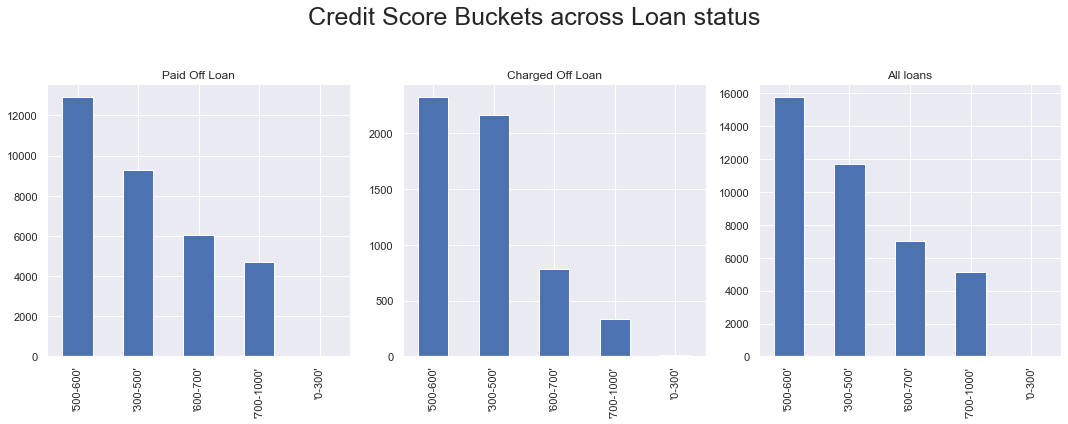

In [57]:
fig, (ax1, ax2 ,ax3) = plt.subplots(ncols=3,sharex=False)
fig.suptitle('Credit Score Buckets across Loan status', fontsize=25)
revised_paidOffloan['CreditScoreBucket'].value_counts().plot.bar(figsize=[15,6],ax=ax1)
revised_chargedOffloan['CreditScoreBucket'].value_counts().plot.bar(figsize=[15,6],ax=ax2)
revised_loan['CreditScoreBucket'].value_counts().plot.bar(figsize=[15,6],ax=ax3)
ax1.set_title('Paid Off Loan')
ax2.set_title('Charged Off Loan')
ax3.set_title('All loans')
fig.tight_layout()
fig.subplots_adjust(top=0.8)
plt.show()

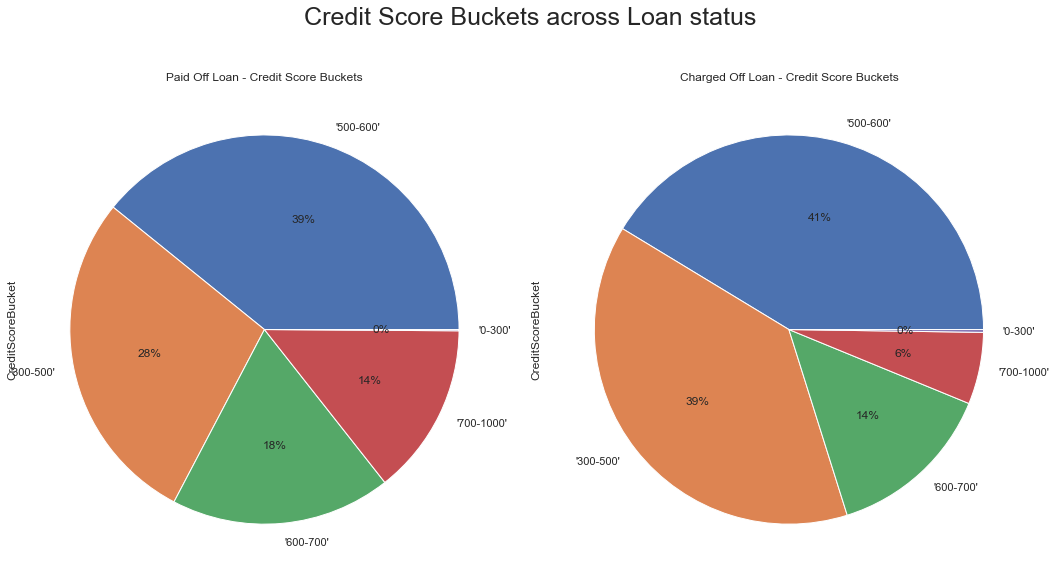

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols=2,sharex=False)
fig.suptitle('Credit Score Buckets across Loan status', fontsize=25)
revised_paidOffloan['CreditScoreBucket'].value_counts().plot.pie(autopct='%.0f%%',figsize=[15,15],ax=ax1)
revised_chargedOffloan['CreditScoreBucket'].value_counts().plot.pie(autopct='%.0f%%',figsize=[15,15],ax=ax2)
ax1.set_title('Paid Off Loan - Credit Score Buckets')
ax2.set_title('Charged Off Loan - Credit Score Buckets')
fig.tight_layout()
fig.subplots_adjust(top=1.35)
plt.savefig("creditScorebucketAnalysis.png", bbox_inches='tight',dpi=300)
plt.show()

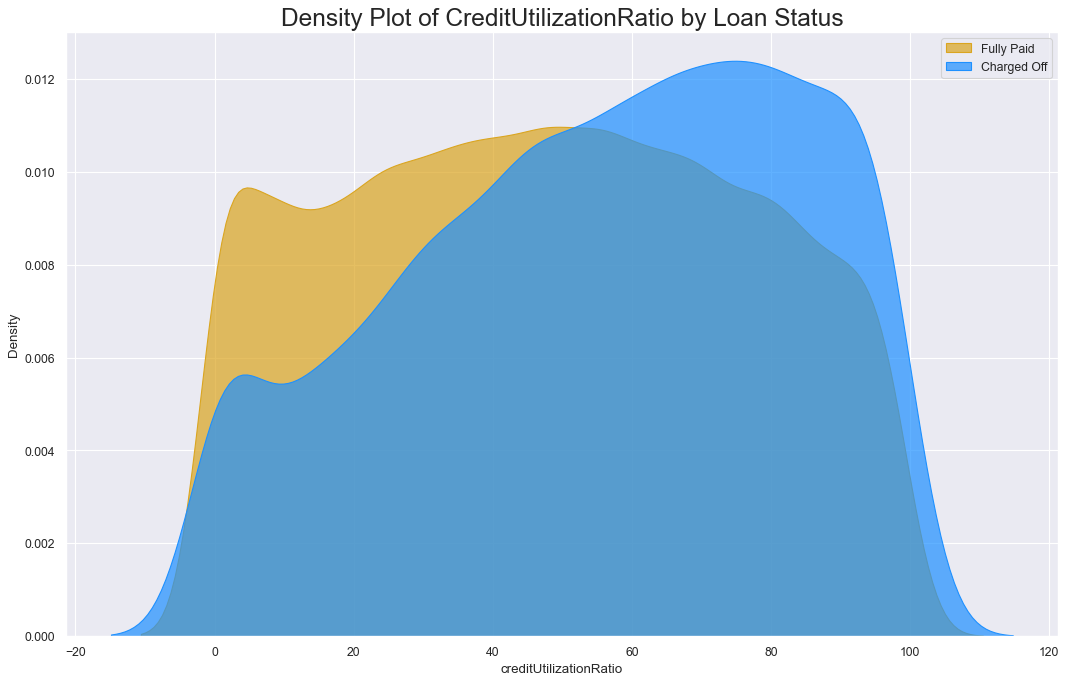

In [59]:
# lets check the skew for the Credit Utilization Ration for different Loan results.

plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Fully Paid", "creditUtilizationRatio"], shade=True, color="goldenrod", label="Fully Paid", alpha=.7)
#sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Current", "creditUtilizationRatio"], shade=True, color="deeppink", label="Current", alpha=.7)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Charged Off", "creditUtilizationRatio"], shade=True, color="dodgerblue", label="Charged Off", alpha=.7)

plt.title('Density Plot of CreditUtilizationRatio by Loan Status', fontsize=22)
plt.legend()
plt.savefig("creditUtilizationScoreAnalysis1.png",bbox_inches='tight', dpi=300)
plt.show()

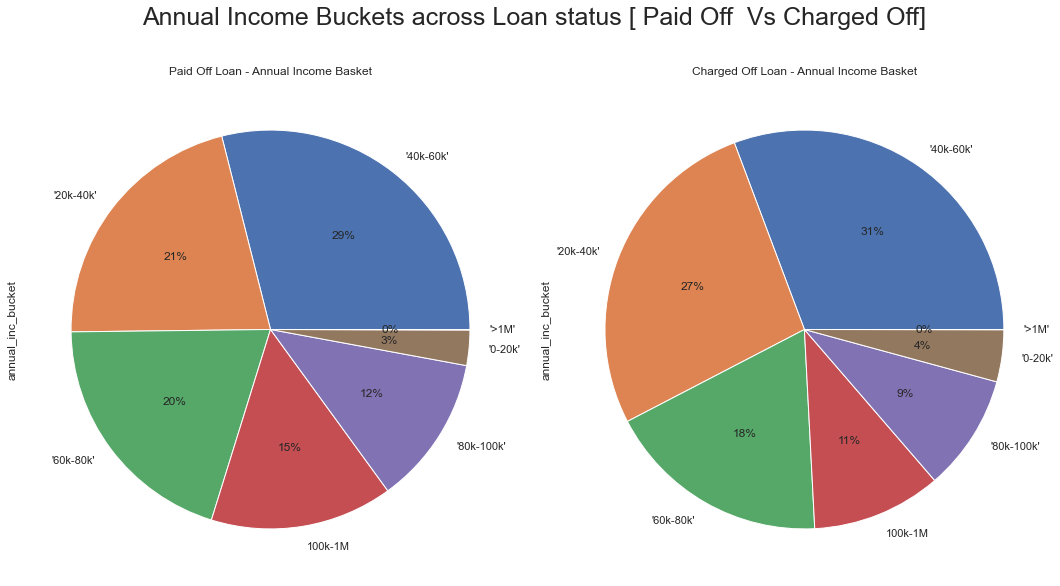

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2,sharex=False)
fig.suptitle('Annual Income Buckets across Loan status [ Paid Off  Vs Charged Off]', fontsize=25)
revised_paidOffloan['annual_inc_bucket'].value_counts().plot.pie(autopct='%.0f%%',figsize=[15,15],ax=ax1)
revised_chargedOffloan['annual_inc_bucket'].value_counts().plot.pie(autopct='%.0f%%',figsize=[15,15],ax=ax2)
ax1.set_title('Paid Off Loan - Annual Income Basket')
ax2.set_title('Charged Off Loan - Annual Income Basket')
fig.tight_layout()
fig.subplots_adjust(top=1.35)
plt.savefig("annualincomebucketAnalysis.png",bbox_inches='tight', dpi=300)
plt.show()

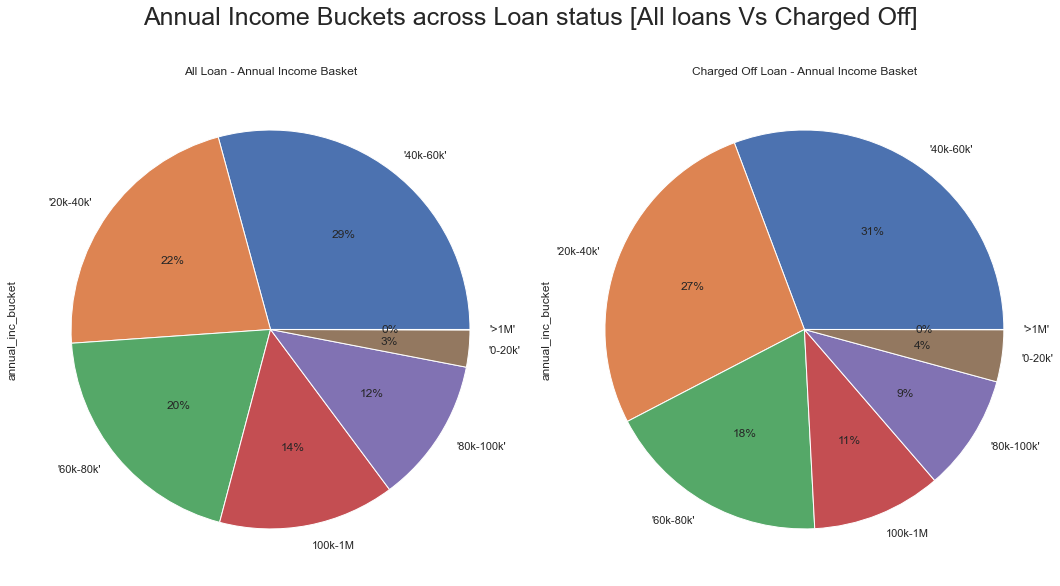

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2,sharex=False)
fig.suptitle('Annual Income Buckets across Loan status [All loans Vs Charged Off] ', fontsize=25)
revised_loan['annual_inc_bucket'].value_counts().plot.pie(autopct='%.0f%%',figsize=[15,15],ax=ax1)
revised_chargedOffloan['annual_inc_bucket'].value_counts().plot.pie(autopct='%.0f%%',figsize=[15,15],ax=ax2)
ax1.set_title('All Loan - Annual Income Basket')
ax2.set_title('Charged Off Loan - Annual Income Basket')
fig.tight_layout()
fig.subplots_adjust(top=1.35)
plt.savefig("annualincomebucketAnalysis2.png",bbox_inches='tight', dpi=300)
plt.show()

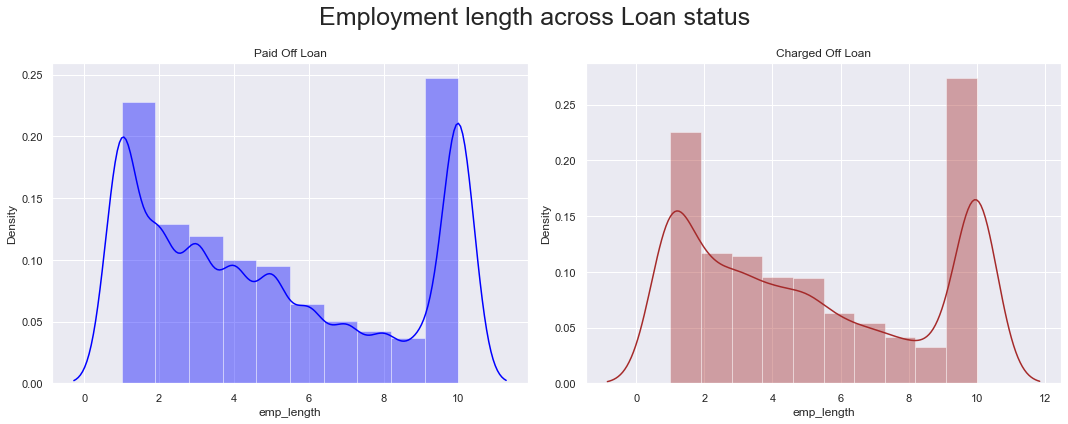

In [62]:
# distplot of 2 scenarios
fig, (ax1, ax2) = plt.subplots(ncols=2,sharex=False)
fig.set_size_inches(15, 6)
fig.suptitle('Employment length across Loan status', fontsize=25)
sns.distplot(paidoff_loan.emp_length, bins=10 , color='blue',ax=ax1)
sns.distplot(chargedoff_loan.emp_length, bins=10 , color='brown',ax=ax2)
ax1.set_title('Paid Off Loan')
ax2.set_title('Charged Off Loan')
fig.tight_layout()
fig.subplots_adjust(top=.85)
plt.savefig("employementlengthanalysis.png",bbox_inches='tight', dpi=300)
plt.show()

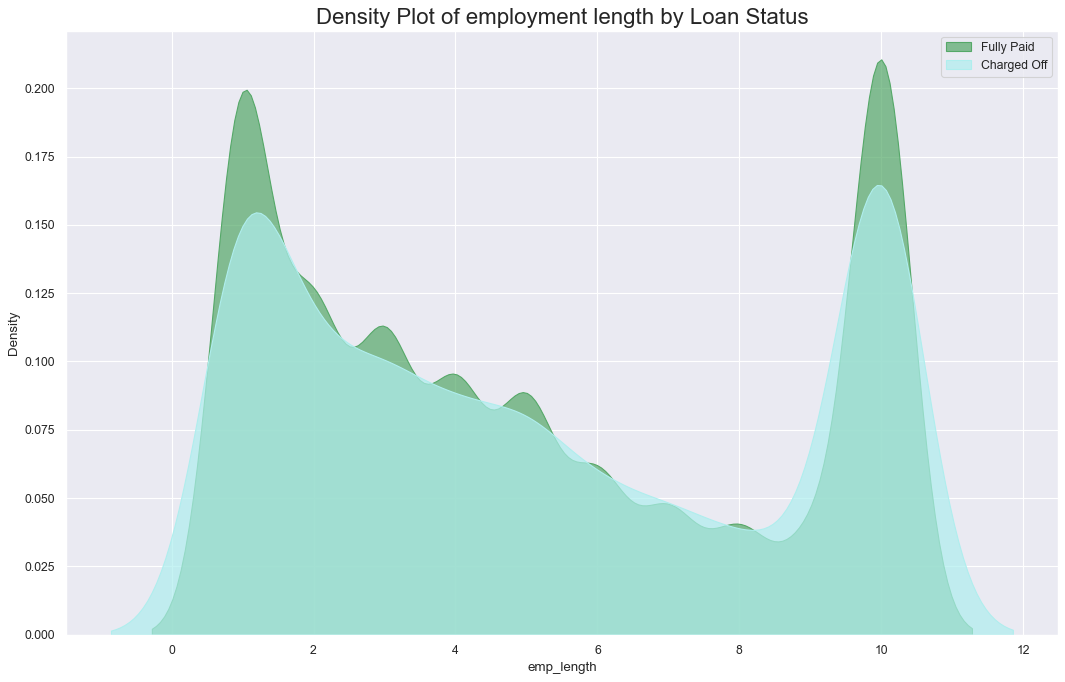

In [63]:
# this is similar to above univariate analysis of Employment length but shown in different way

plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Fully Paid", "emp_length"], shade=True, color="g", label="Fully Paid", alpha=.7)
#sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Current", "CreditScore"], shade=True, color="deeppink", label="Current", alpha=.7)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Charged Off", "emp_length"], shade=True, color="paleturquoise", label="Charged Off", alpha=.7)

plt.title('Density Plot of employment length by Loan Status', fontsize=20)
plt.legend()
plt.savefig("employementlengthanalysis2.png",bbox_inches='tight', dpi=300)
plt.show()

In [64]:
# top 5 Percentage of title or loan reasons for all loans Vs Charged off loans
print ( "Top 5 reasons in over all loans:\n")
print (cleaned_loan['purpose'].value_counts(normalize=True).head(5))
print ( "\nTop 5 reasons in Charged off loans:\n")
print (chargedoff_loan['purpose'].value_counts(normalize=True).head(5))

Top 5 reasons in over all loans:

debt_consolidation    0.469346
credit_card           0.129164
other                 0.100536
home_improvement      0.074930
major_purchase        0.055065
Name: purpose, dtype: float64

Top 5 reasons in Charged off loans:

debt_consolidation    0.491736
other                 0.112493
credit_card           0.096321
small_business        0.084414
home_improvement      0.061667
Name: purpose, dtype: float64


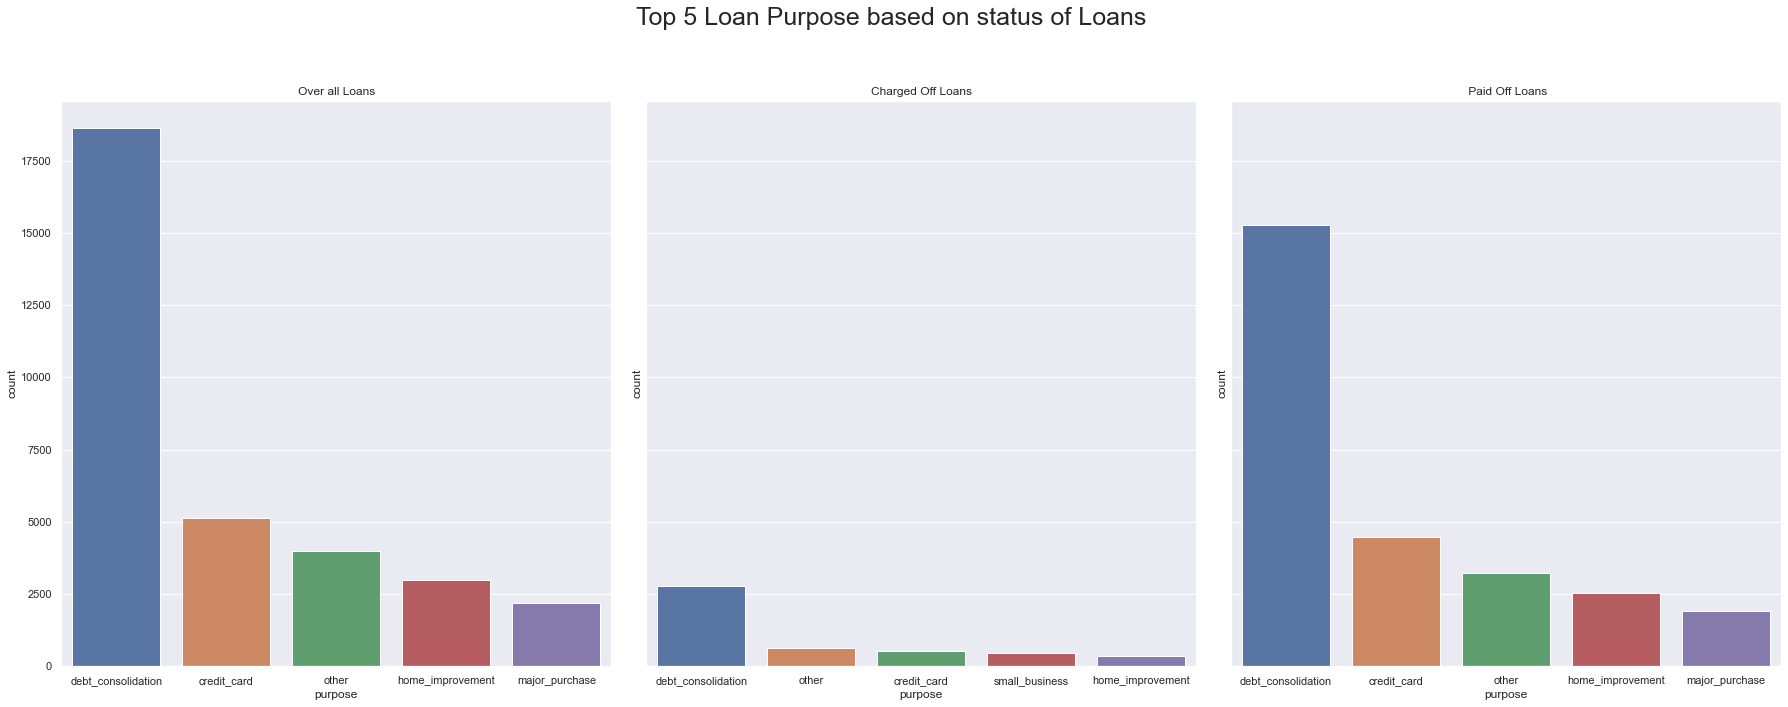

In [65]:
fig, (ax1, ax2 , ax3) = plt.subplots(ncols=3,sharey=True)
fig.set_size_inches(25, 10)
fig.suptitle('Top 5 Loan Purpose based on status of Loans ', fontsize=25)
sns.set(font_scale=0.8) # font size 0.9
sns.countplot(x="purpose",data=revised_loan,order = revised_loan['purpose'].value_counts().iloc[:5].index,ax=ax1)
sns.countplot(x="purpose",data=revised_chargedOffloan,order = revised_chargedOffloan['purpose'].value_counts().iloc[:5].index,ax=ax2)
sns.countplot(x="purpose",data=revised_paidOffloan,order = revised_paidOffloan['purpose'].value_counts().iloc[:5].index,ax=ax3)
sns.set(font_scale=1) # font size 0.9
ax1.set_title('Over all Loans')
ax2.set_title('Charged Off Loans')
ax3.set_title(' Paid Off Loans')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.savefig("purposeVsLoans.png", bbox_inches='tight',dpi=300)
plt.show()

<Figure size 1584x1080 with 0 Axes>

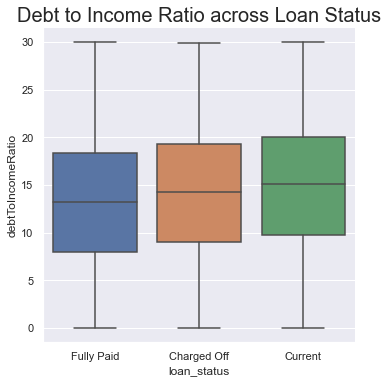

In [66]:
plt.figure(figsize = (22,15))
sns.set(font_scale=1) # font size 1
sns.catplot(x="loan_status", y="debtToIncomeRatio",
            kind="box", dodge=False, data=cleaned_loan)

plt.title("Debt to Income Ratio across Loan Status" , fontsize=20)
plt.savefig("DTIVsLoans.png", bbox_inches='tight',dpi=300)
plt.show()

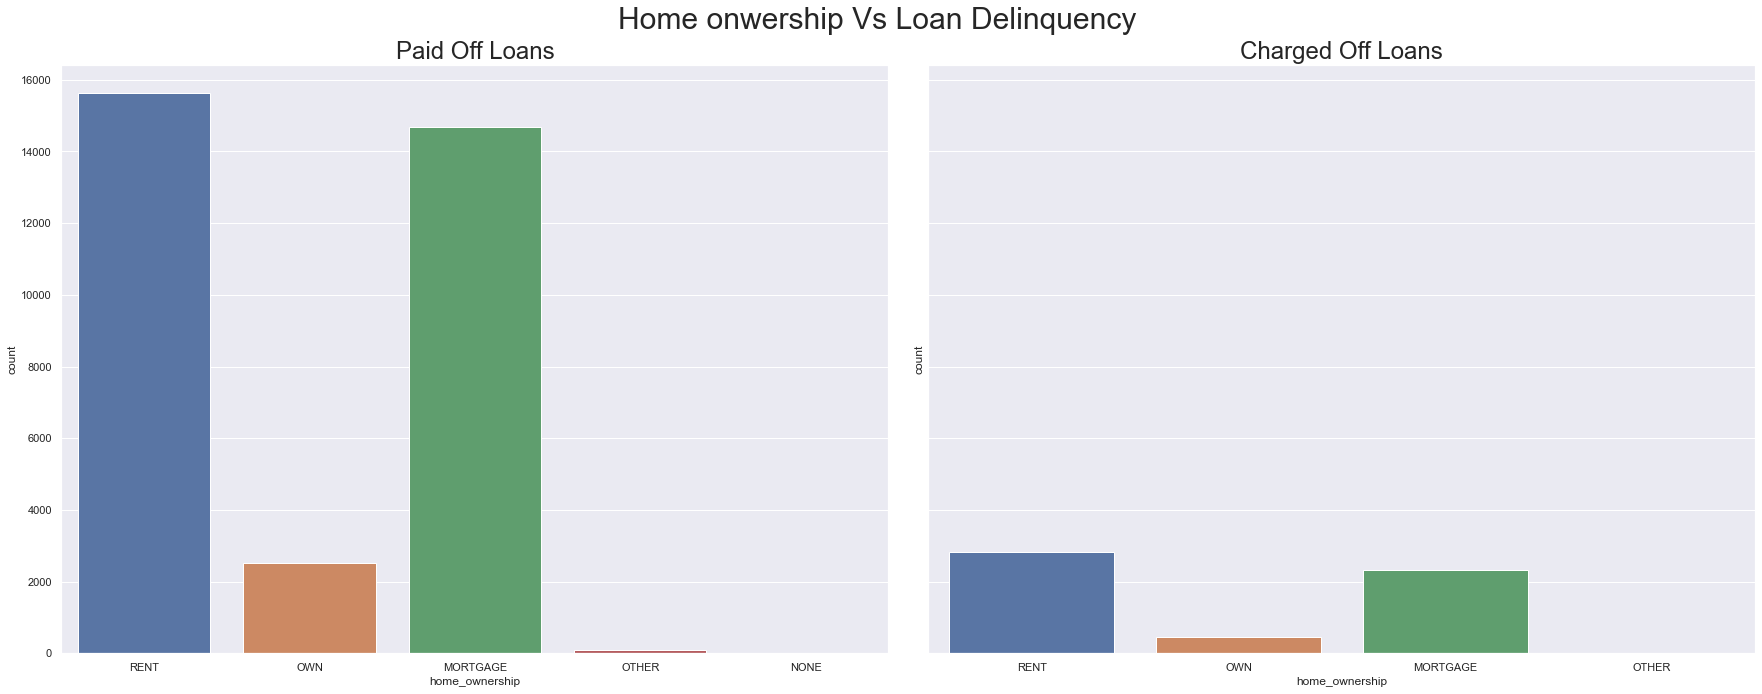

In [67]:
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(25, 10)
fig.suptitle('Home onwership Vs Loan Delinquency ', fontsize=30)
sns.set(font_scale=2) # font size 0.9
sns.countplot(x="home_ownership",data=revised_paidOffloan,ax=ax1)
sns.countplot(x="home_ownership",data=revised_chargedOffloan,ax=ax2)
sns.set(font_scale=2) # font size 0.9
ax1.set_title('Paid Off Loans')
ax2.set_title('Charged Off Loans')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig("homeownershipVsLoans.png", bbox_inches='tight',dpi=300)
plt.show()

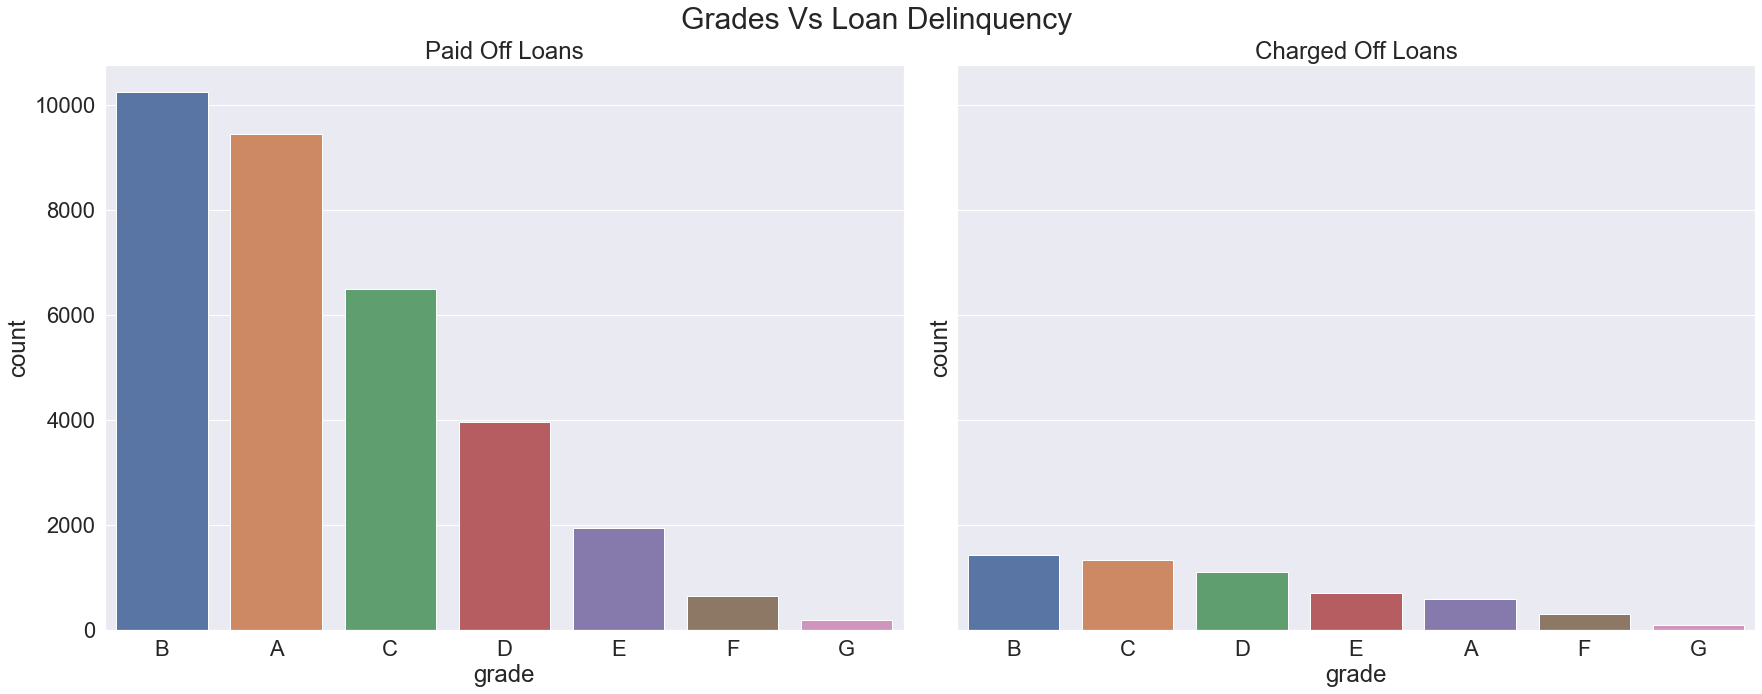

In [68]:
fig, (ax1, ax2 ) = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(25, 10)
fig.suptitle('Grades Vs Loan Delinquency ', fontsize=30)
sns.set(font_scale=2) # font size 0.9
sns.countplot(x="grade",data=revised_paidOffloan,order = revised_paidOffloan['grade'].value_counts().index,ax=ax1)
sns.countplot(x="grade",data=revised_chargedOffloan,order = revised_chargedOffloan['grade'].value_counts().index,ax=ax2)
sns.set(font_scale=2) # font size 0.9
ax1.set_title('Paid Off Loans')
ax2.set_title('Charged Off Loans')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig("gradesVsLoans.png", bbox_inches='tight',dpi=300)
plt.show()

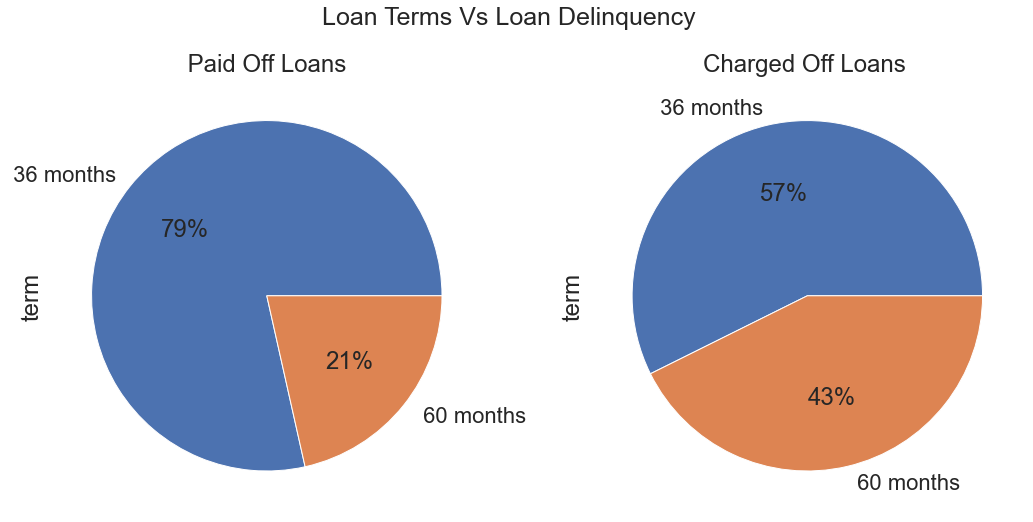

In [69]:
fig, (ax1, ax2 ) = plt.subplots(ncols=2,sharex=False)
fig.set_size_inches(25, 10)
fig.suptitle('Loan Terms Vs Loan Delinquency ', fontsize=25)
sns.set(font_scale=2)
revised_paidOffloan['term'].value_counts().plot.pie(autopct='%.0f%%',figsize=[15,15],ax=ax1)
revised_chargedOffloan['term'].value_counts().plot.pie(autopct='%.0f%%',figsize=[15,15],ax=ax2)
ax1.set_title(' Paid Off Loans ')
ax2.set_title('Charged Off Loans ')
fig.tight_layout()
fig.subplots_adjust(top=1.4)
plt.savefig("termVsLoans.png", bbox_inches='tight',dpi=300)
plt.show()

In [70]:
state_performance=pd.DataFrame()
state_performance['state']=revised_loan['addr_state'].unique()
state_performance['chargedOffPercentage']=state_performance['state'].apply(lambda x: revised_chargedOffloan[revised_chargedOffloan['addr_state'] == x].shape[0] / revised_loan[revised_loan['addr_state'] == x].shape[0] * 100)
state_performance.sort_values(by='chargedOffPercentage',ascending=False,inplace=True)
state_performance.set_index('state', inplace=True)
state_performance['chargedOffPercentage'].describe()

count    50.000000
mean     13.735882
std       7.932587
min       0.000000
25%      11.864686
50%      13.079724
75%      15.427238
max      60.000000
Name: chargedOffPercentage, dtype: float64

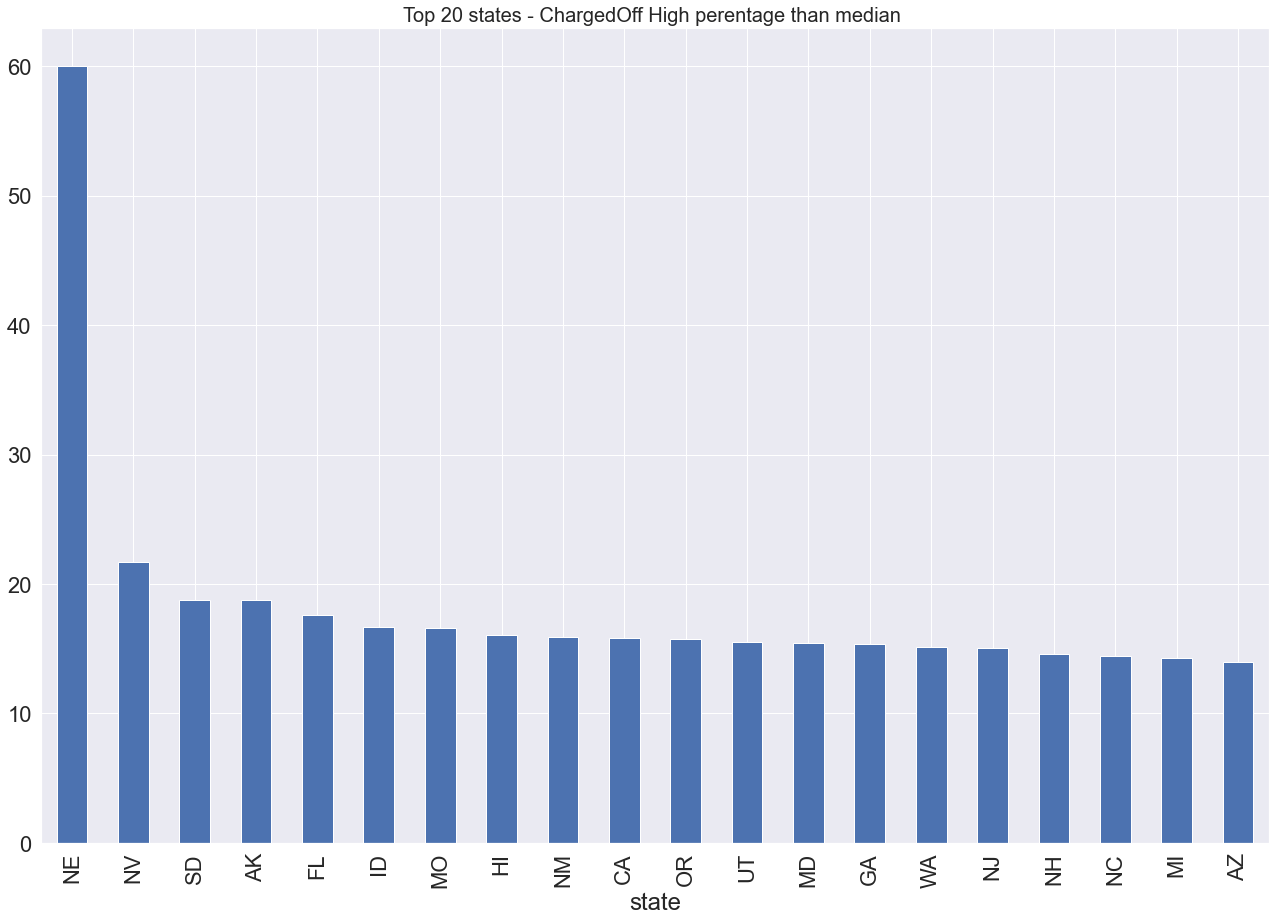

In [71]:
plt.figure(figsize = (22,15))
plt.title("Top 20 states - ChargedOff High perentage than median " , fontsize=20)
state_performance['chargedOffPercentage'][:20].plot(kind='bar')
plt.savefig("StatesWithhighChargedoffPercentage.png", bbox_inches='tight',dpi=300)
plt.show()

In [72]:
# lets find the more than 75% percentile chargedoff percentage STATES. !!
state_bad_performance=state_performance[state_performance['chargedOffPercentage'] >= (state_performance['chargedOffPercentage'].quantile(0.75))]

In [73]:
state_bad_performance.index

Index(['NE', 'NV', 'SD', 'AK', 'FL', 'ID', 'MO', 'HI', 'NM', 'CA', 'OR', 'UT',
       'MD'],
      dtype='object', name='state')

In [74]:
#Lets find the high percentage zip codes out of all states 
zipcode_performance=pd.DataFrame()
zipcode_performance['zip_code']=revised_chargedOffloan['zip_code'].unique()
zipcode_performance['chargedOffPercentage']=zipcode_performance['zip_code'].apply(lambda x: revised_chargedOffloan[revised_chargedOffloan['zip_code'] == x].shape[0] / revised_loan[revised_loan['zip_code'] == x].shape[0] * 100)
zipcode_performance['state']=zipcode_performance['zip_code'].apply(lambda x: revised_loan[revised_loan['zip_code'] == x]['addr_state'].unique()[0])
zipcode_performance.sort_values(by='chargedOffPercentage',ascending=False,inplace=True)
#zipcode_performance.set_index('zip_code', inplace=True)

In [75]:
# find number of entries for each zipcode 

zipcode_performance['count']=zipcode_performance['zip_code'].apply(lambda x: revised_chargedOffloan[revised_chargedOffloan['zip_code'] == x].shape[0])
# lets take entries whihc has a considerable count , lets say 10.
zipcode_performance = zipcode_performance[zipcode_performance['count'] >= 10 ]
zipcode_performance.sort_values(['chargedOffPercentage'],ascending=[False],inplace=True)


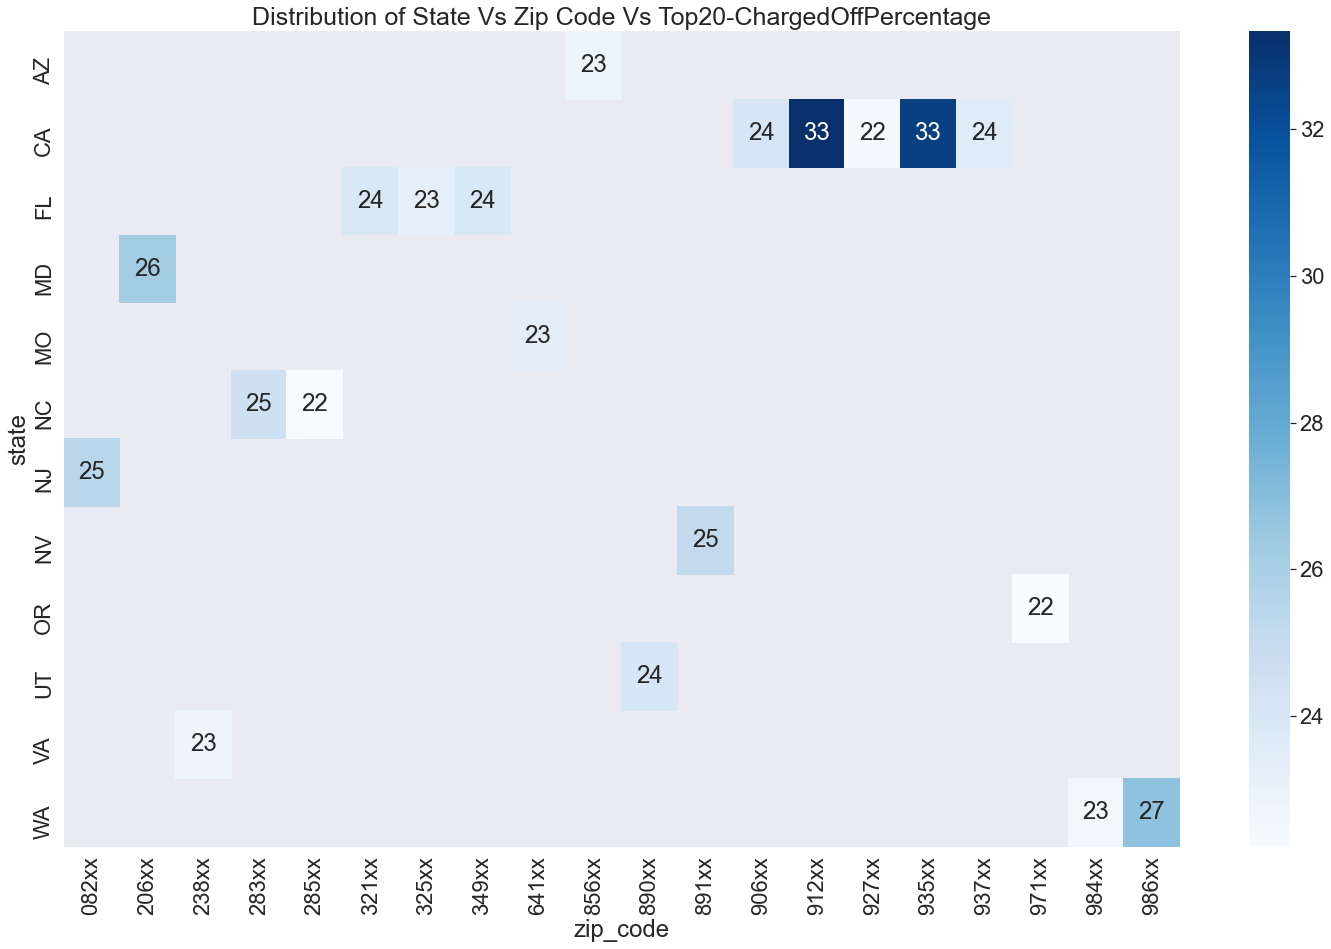

In [76]:
# Pivot Aggregation of zip code & state against highest count of charged off Loans 
plt.figure(figsize = (25,15))
sns.set(font_scale=2) # font size 2
sns.heatmap(pd.pivot_table(zipcode_performance.head(20), index='state', columns='zip_code', values='chargedOffPercentage',aggfunc=np.max),cmap="Blues",annot=True)
plt.title(" Distribution of State Vs Zip Code Vs Top20-ChargedOffPercentage " , fontsize=25)
plt.savefig("ZipCodeHighPercentageAnalysis.png", bbox_inches='tight',dpi=300)
plt.show()

## 7) Univariate Analysis - Inferences

<ul>
<li> <span style='color:Dark Green'> Credit Score Median is around 530-560 points for all and charged off loans , but there is higher percentage of 300-500 bucket Credit Scores in ChargedOff loan category 
![image.png](attachment:image.png) </span> </li>
    
<li> <span style='color:Dark Green'> Low Credit Score points bucket is high for charged off loans and although it cannot be said if a 500-600 or 700-100 credit Score will not lead to failed loan , but low credit Score has more probability of failed loan </span> </li>
    
<li> <span style='color:Dark Green'> Credit Utilization ratio has an impact to loan status  the higher the ratio , there are more cases of ChargedOff loans </span> </li>
    
<li> <span style='color:Dark Green'> Debt to Income ratio has slight relation to loan success , chargedOff case are of higher ratio value , it shows more debts cause loan delinquency </span> </li>
    
<li> <span style='color:Dark Green'> 'Debt consolidation' seems to be prominent purpose/reason for loans and it also contributes to maximum charged off loans but  top5 purpose analysis shows no connection to loan success 
![image-2.png](attachment:image-2.png) </span> </li>
    
<li> <span style='color:Dark Green'> Employment Length, annual Income , purpose , home ownership , zip code, grades has minimal impact/ connection to paid or chargedOff loans </span>  </li>

<li> <span style='color:Dark Green'> Long Term loans have higher percentage to loan failure compared to short term loans </span>  </li>
    
</ul>

## 8)  Bivariate Analysis

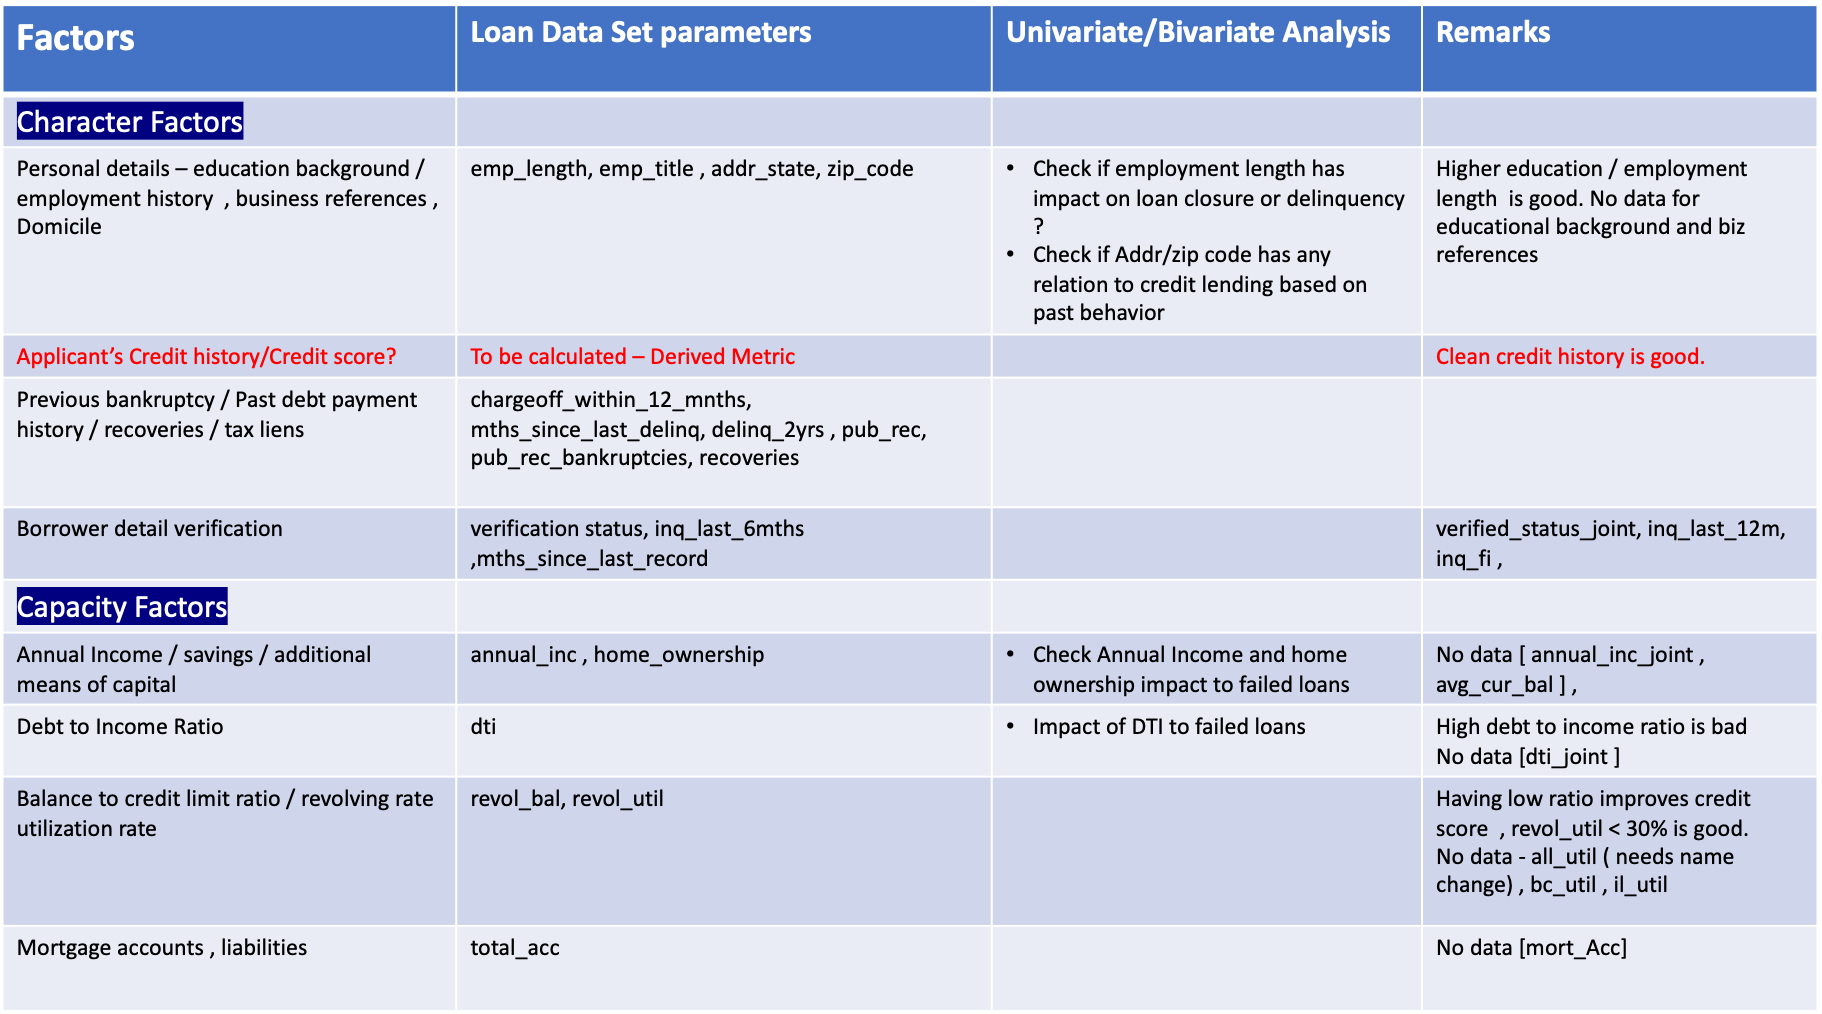





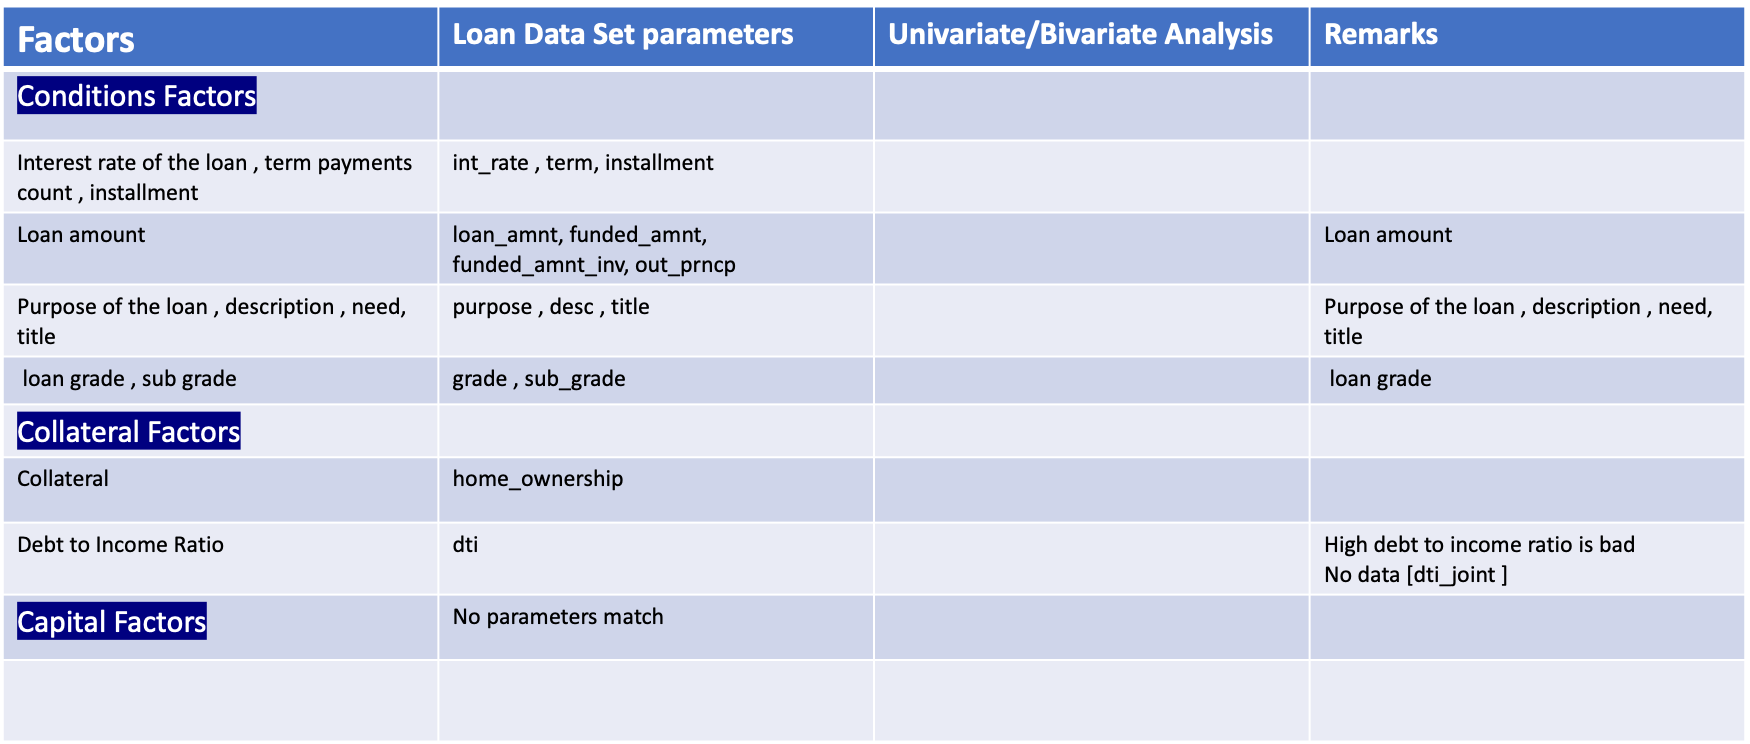

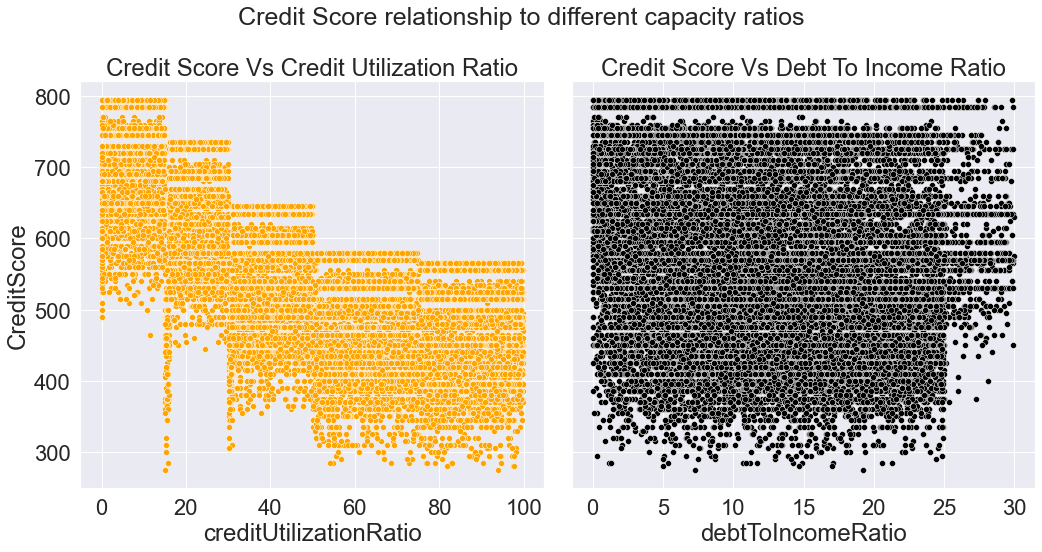

In [77]:
# Scatter plot of 2 scenarios
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(15, 8)
fig.suptitle('Credit Score relationship to different capacity ratios', fontsize=25)
sns.scatterplot(revised_loan['creditUtilizationRatio'],revised_loan['CreditScore'],color='Orange',ax=ax1)
sns.scatterplot(revised_loan['debtToIncomeRatio'],revised_loan['CreditScore'],color='black',ax=ax2)
ax1.set_title('Credit Score Vs Credit Utilization Ratio')
ax2.set_title('Credit Score Vs Debt To Income Ratio')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.savefig("creditScoreRatioAnalysis.png", bbox_inches='tight',dpi=300)
plt.show()

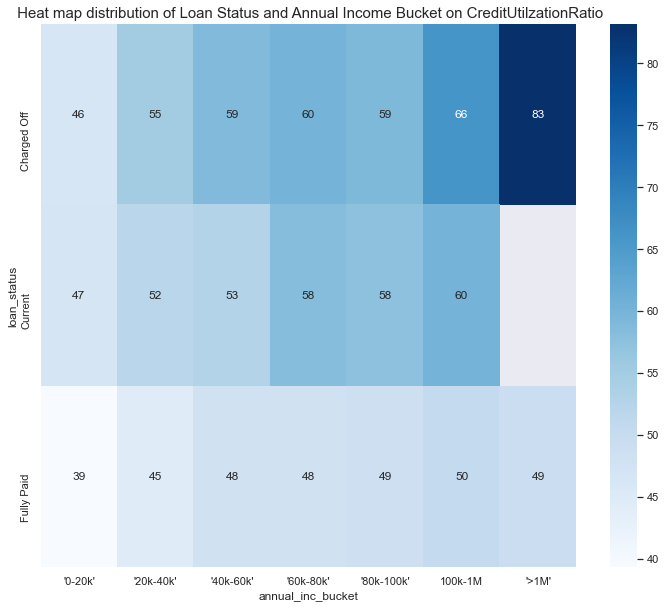

In [78]:
# Pivot Aggregation of Loan status against annual income bucket on Median value of creditUtilizationRatio 
plt.figure(figsize = (12,10))
sns.set(font_scale=1) # font size 2
sns.heatmap(pd.pivot_table(revised_loan, index='loan_status', columns='annual_inc_bucket', values='creditUtilizationRatio',aggfunc=np.median),cmap="Blues",annot=True)
plt.title(" Heat map distribution of Loan Status and Annual Income Bucket on CreditUtilzationRatio" , fontsize=15)
plt.savefig("AnnIncomeVsCReUtilRatioVsLoanstatusanalysis.png", bbox_inches='tight',dpi=300)
plt.show()

In [79]:
revised_loan['verification_status'].value_counts()

Not Verified       16918
Verified           12808
Source Verified     9986
Name: verification_status, dtype: int64

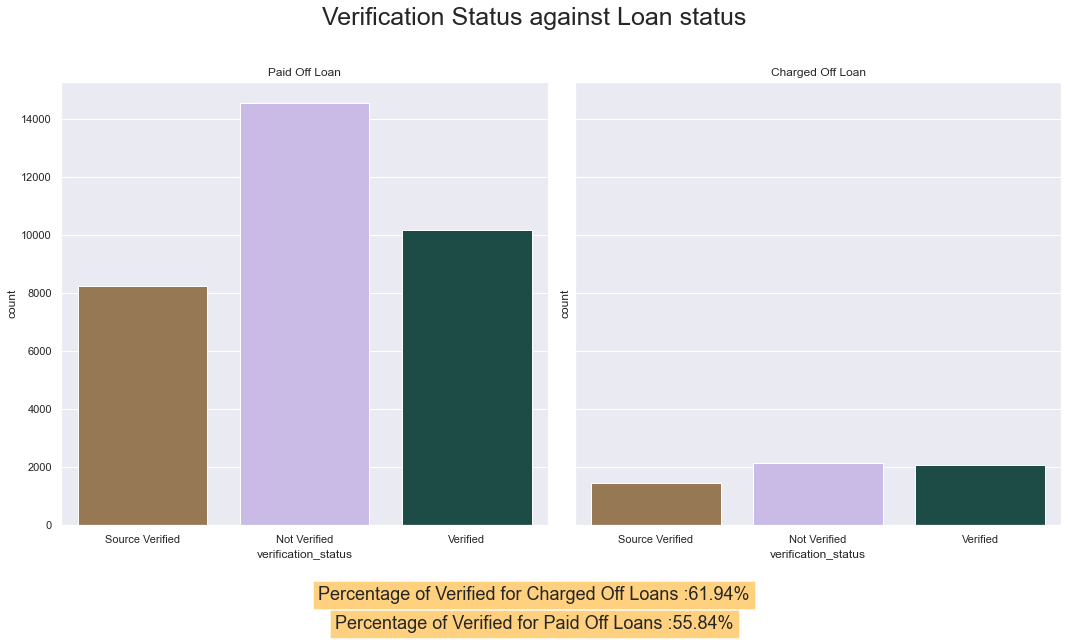

In [80]:
VerStatusChargedOff=str(round(((len(revised_chargedOffloan[revised_chargedOffloan['verification_status'] == 'Source Verified' ]) + len(revised_chargedOffloan[revised_chargedOffloan['verification_status'] == 'Verified' ])) / len(revised_chargedOffloan) * 100),2))+"%"
VerStatusPaidOff=str(round(((len(revised_paidOffloan[revised_paidOffloan['verification_status'] == 'Source Verified']) + len(revised_paidOffloan[revised_paidOffloan['verification_status'] == 'Verified' ])) / len(revised_paidOffloan) * 100),2))+"%"
# Scatter plot of 2 scenarios
color_labels = revised_loan['verification_status'].unique()
# List of color palette to use
rgb_values = sns.color_palette("cubehelix", 3)
# Map label to color palette
color_map = dict(zip(color_labels, rgb_values))
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True)
fig.set_size_inches(15, 8)
fig.suptitle('Verification Status against Loan status', fontsize=25)
sns.countplot(x="verification_status",data=revised_paidOffloan,order=["Source Verified", "Not Verified", "Verified"],palette=color_map,ax=ax1)
sns.countplot(x="verification_status",data=revised_chargedOffloan ,order=["Source Verified", "Not Verified", "Verified"], palette=color_map,ax=ax2)
ax1.set_title('Paid Off Loan')
ax2.set_title('Charged Off Loan')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.figtext(0.5, -0.05, "Percentage of Verified for Charged Off Loans :%s"%VerStatusChargedOff, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.5, -0.1, "Percentage of Verified for Paid Off Loans :%s"%VerStatusPaidOff, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.savefig("Verificationstatusanalysis.png", bbox_inches='tight',dpi=300)
plt.show()

In [81]:
recoverygroup=revised_chargedOffloan.groupby(['annual_inc_bucket'])['recoveries'].sum()
recoverygroup=recoverygroup.reset_index()
recoverygroup.sort_values('recoveries', inplace=True)

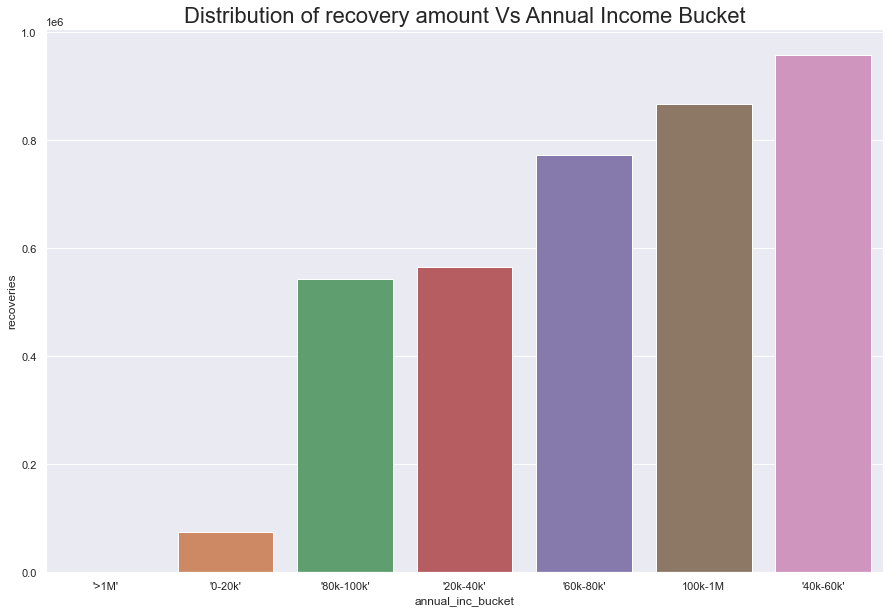

In [82]:
plt.figure(figsize = (15,10))
sns.set(font_scale=1) # font size 1 
sns.barplot(data=recoverygroup,x="annual_inc_bucket",y="recoveries",order=recoverygroup['annual_inc_bucket'])
plt.title("Distribution of recovery amount Vs Annual Income Bucket" , fontsize=22)
plt.show()

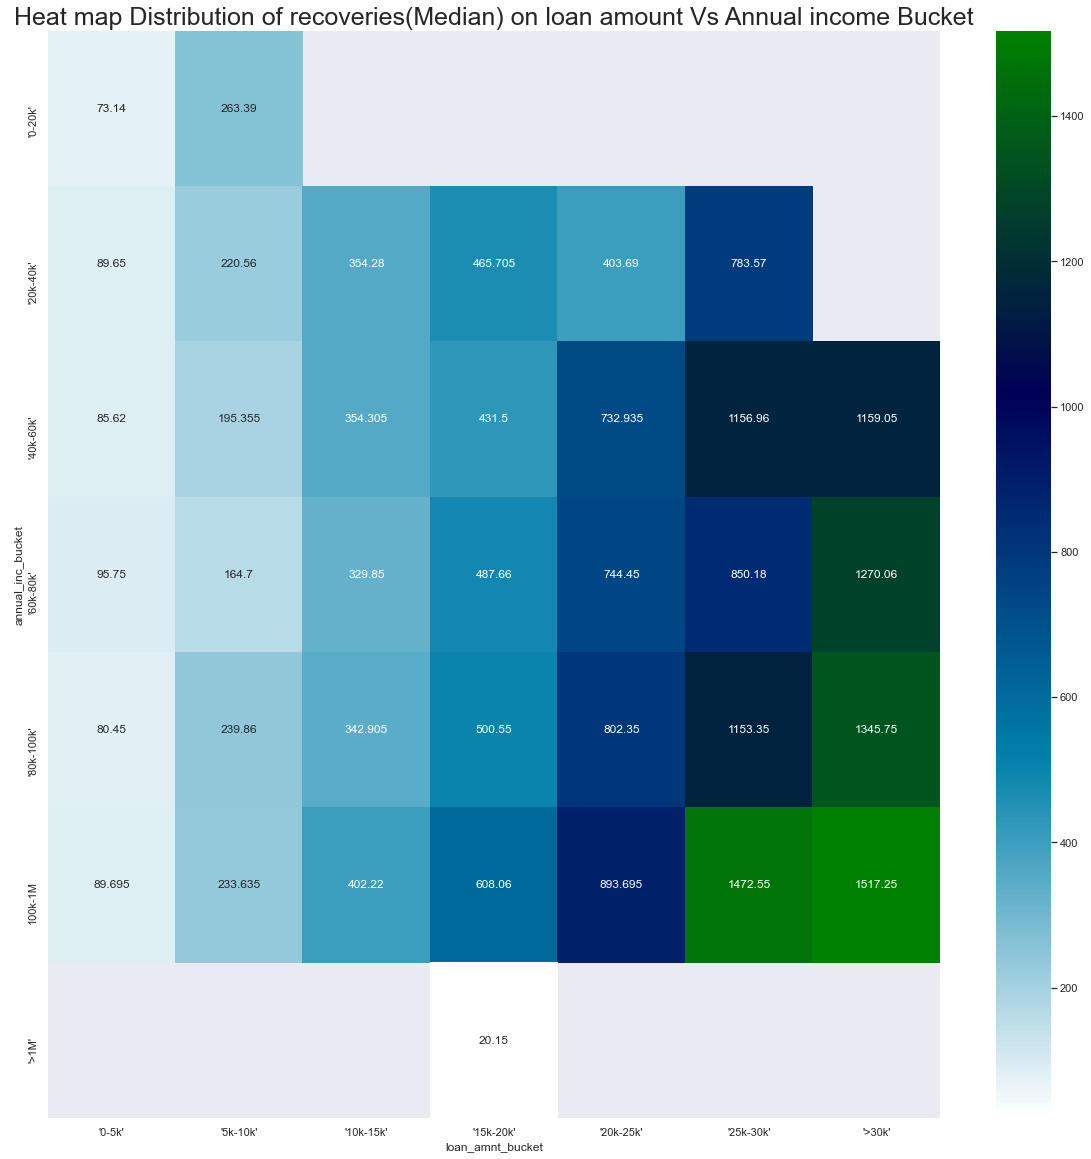

In [83]:
# Pivot Aggregation of loan amount against annual_inc_bucket on median value of recoveries
plt.figure(figsize = (20,20))
sns.heatmap(pd.pivot_table(revised_chargedOffloan, index='annual_inc_bucket', columns='loan_amnt_bucket', values='recoveries',aggfunc=np.median),cmap="ocean_r",annot=True,fmt='g')
sns.set(font_scale=1) 
plt.title(" Heat map Distribution of recoveries(Median) on loan amount Vs Annual income Bucket " , fontsize=25)
plt.savefig("AnnIncomeVsRecoveriesVsLoanAmountanalysis.png", bbox_inches='tight',dpi=300)
plt.show()

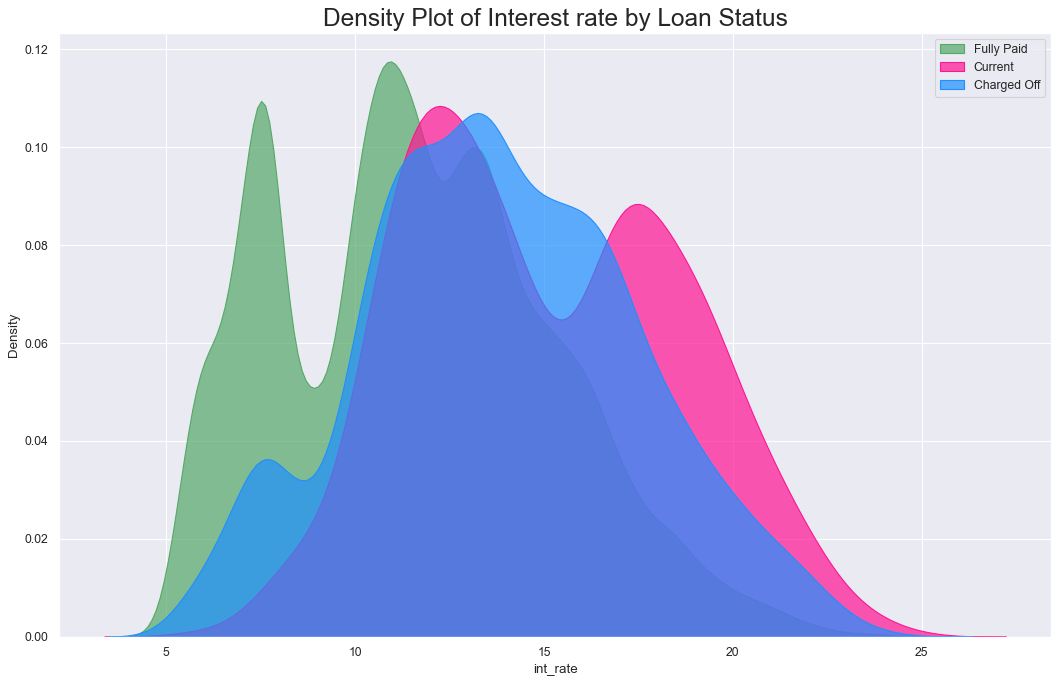

In [84]:
# lets check the skew for the interest rate for different Loan results.

plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Fully Paid", "int_rate"], shade=True, color="g", label="Fully Paid", alpha=.7)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Current", "int_rate"], shade=True, color="deeppink", label="Current", alpha=.7)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Charged Off", "int_rate"], shade=True, color="dodgerblue", label="Charged Off", alpha=.7)

plt.title('Density Plot of Interest rate by Loan Status', fontsize=22)
plt.legend()
plt.savefig("InterestRatebyLoanStatus.png", bbox_inches='tight',dpi=300)
plt.show()

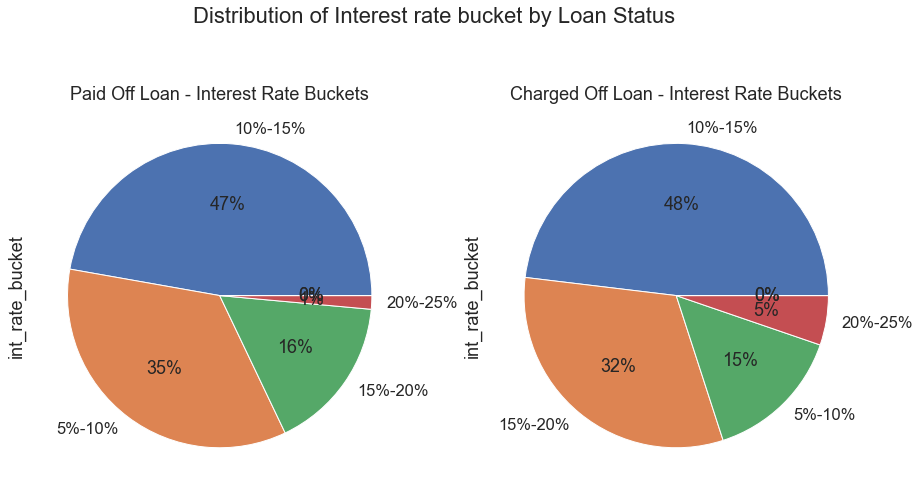

In [85]:
sns.set(font_scale=1.5) 
fig, (ax1, ax2) = plt.subplots(ncols=2,sharex=False)
fig.suptitle('Distribution of Interest rate bucket by Loan Status', fontsize=22)
revised_paidOffloan['int_rate_bucket'].value_counts().plot.pie(autopct='%.0f%%',figsize=[15,15],ax=ax1)
revised_chargedOffloan['int_rate_bucket'].value_counts().plot.pie(autopct='%.0f%%',figsize=[15,15],ax=ax2)
ax1.set_title('Paid Off Loan - Interest Rate Buckets')
ax2.set_title('Charged Off Loan - Interest Rate Buckets')
fig.subplots_adjust(top=1.3)
plt.savefig("InterestRatebucketDistributionLoanStatus.png", bbox_inches='tight',dpi=300)
plt.show()

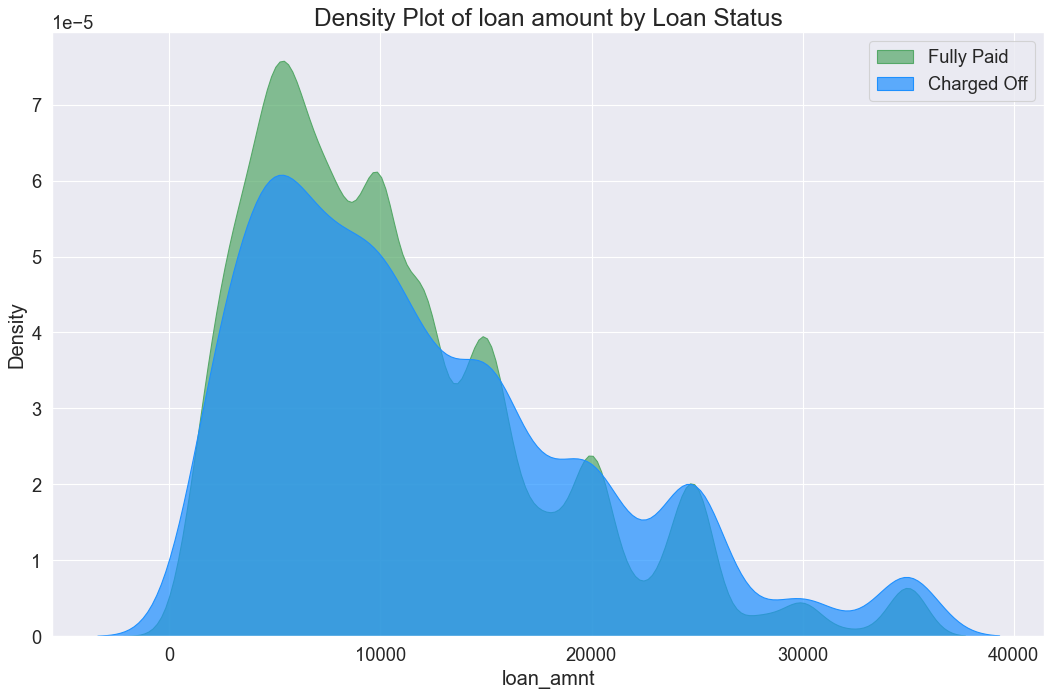

In [86]:
# lets check the skew for the installment amount for different Loan results.

plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Fully Paid", "loan_amnt"], shade=True, color="g", label="Fully Paid", alpha=.7)
#sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Current", "installment"], shade=True, color="deeppink", label="Current", alpha=.7)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Charged Off", "loan_amnt"], shade=True, color="dodgerblue", label="Charged Off", alpha=.7)

plt.title('Density Plot of loan amount by Loan Status', fontsize=22)
plt.legend()
plt.savefig("LoanAmountDistributionLoanStatus.png", bbox_inches='tight',dpi=300)
plt.show()

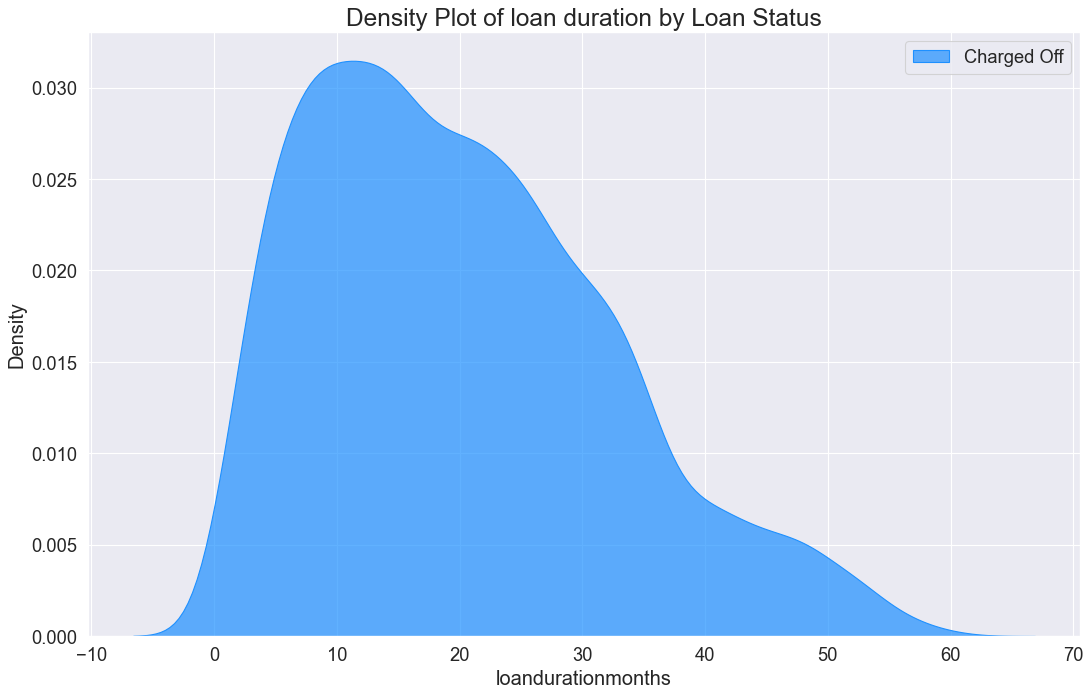

In [87]:
# lets check the skew for the loan duration months  for different Loan results.

plt.figure(figsize=(16,10), dpi= 80)

sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Charged Off", "loandurationmonths"], shade=True, color="dodgerblue", label="Charged Off", alpha=.7)

plt.title('Density Plot of loan duration by Loan Status', fontsize=22)
plt.legend()
plt.savefig("LoanDurationMonthsforChargedOffLoanStatus.png", bbox_inches='tight',dpi=300)
plt.show()

##  9) Bivariate Analysis : Inferences on Credit Loan Decision </span>

<ul>
<li> <span style='color:Dark Green'> Credit utilization Ratio has a direct relationship to Credit Score as we know from our own calculations formula , it also means DTI has no so direct relationship to credit Score, it may be important to see DTI for credit funding but it has not much effect to Credit Score </span> </li>
    
<li> <span style='color:Dark Green'> With Pivot of CreditUtilizationRatio to Annual income bucket and loan status , we see higher the income bucket , for failed loans  , the credit utilization ratio is higher , it also could mean  higher income bucket with high credit utilization score have more chances for failed loans </span> </li>
    
<li> <span style='color:Dark Green'> With Pivot of Annual Income bucket with median recovery amount Vs Loan amount bucket, we see for the same loan amount buckets, recoveries is better with higher annual income buckets. </span> </li>
    
<li> <span style='color:Dark Green'> Verified Loans have no direct connection to loan failures, both verified and not verified have loan failure cases with almost percentages , infact chargedOff loans have higher percentage of Verification </span>  </li>
    
<li> <span style='color:Dark Green'> Interest Rate ranges are little skewed on lower rates having more paid off loans than higher rates leading to charged Off loans </span>  </li>
    
<li> <span style='color:Dark Green'> 5-15% Interest rate has been more successful for Paid off loans.</span>  </li>

<li> <span style='color:Dark Green'> For ChargedOffLoans , we see most of the people have paid instalments max for 10-12 months – almost 35% , so it is a factor to decide getting less damage by planning out interest rate to get maximum out in 1st 12 months. </span>  </li>
    
<li> <span style='color:Dark Green'> For ChargedOffLoans , we see most of the people have paid instalments max for 10-12 months – almost 35% , so it is a factor to decide getting less damage by planning out interest rate to get maximum out in 1st 12 months. </span>  </li>
    
<li> <span style='color:Dark Green'> There is no correlation of loan amount value Vs Loan success of failure !
</span>  </li>
    
    
</ul>

## 10) Summary of Analysis </span>

<ul>
<li> <span style='color:Dark Green'> Credit Score and Credit utilization Ration have an important role and decision making factor to grant loans </span> </li>
    
<li> <span style='color:Dark Green'> Long term and loans for debt consolidations have a skew towards failure chances </span> </li>
    
<li> <span style='color:Dark Green'> High Loan Interest Rates also have an impactful factor for loan success </span> </li>
    
<li> <span style='color:Dark Green'> Certain states and zip codes in them have a considerable factor to decide on loan grant , may be better to watch out more on them or understand why is the case? </span>  </li>
    
<li> <span style='color:Dark Green'> Although Verification is important , it is no guarantee that loan will succeed if all is well in verification </span>  </li>
    
<li> <span style='color:Dark Green'> Higher Annual Income bucket is important to consider especially during recoveries </span>  </li>
    
</ul>